$$\text{Comparing Kernel function and Bandwidth selection Methods for Crop Yield Density Estimation}$$

# Introduction

- In the problem of modeling stochastic estimation, gausian mixture and kerenel density estimation approaches are frequiently devised methods.
- Here, an emphasis is given to **kerenel density estimation(KDE)** for crop yield densiy estimation
- - Kernel density estimation (KDE) is a statistical technique used to estimate the probability density function of a random variable. It creates a smooth curve from discretely sampled data that reflects the underlying density distribution.
- Two important constructor of **KDE** includes 
> - Kerenel function `K(.)`
> - Bandwidth or smoothing parameter `h`
- Given a set of independent and identically distributed samples $x = {x_1, x_2, …, x_n}$ , the KDE process can be formulated as:

$$k(x) = \frac{1}{nh}\sum_{i=1}^nK(\frac{x-x_i}{h})\tag{1}\\
\text{Subject to:}\\
\int_{-\infty}^{\infty}k(t)=1\\
\int_{-\infty}^{\infty}tk(t)=0\\
\int_{-\infty}^{\infty}k^2(t)>0$$ 
where $t=\frac{x-x_i}{h}$

- While kernel function `K(x)`  assigns a weight for any $x_i$,regarding their distance to `x`, bandwidth `h` control the distance. 
- One important assumption with regard to `K(x)` is that it should be summ or integrated into unit to take it as substitute of probability density function. 
- By constraint one, for gievn estimated $\hat{f}(x)$ of true pdf $f(x)$,$\hat{f}(x)=K(x)$

since $$\hat{f}(x) = \frac{1}{N} \sum_{i=1}^N K \left( x-x_i \right) \quad \to \quad \hat{f}(x) = \frac{1}{N h} \sum_{i=1}^N K \left( \frac{x-x_i}{h} \right)$$
 
> - When $h \to 0$, the estimate becomes jagged (***high variance***, _overfitting_).

> - When $h \to \infty$, the estimate becomes oversmoothed (***high bias***, _underfitting_).

- The _Bandwidth_ (`bw`) parameter,`h` is implemented so that it corresponds to the standard deviation $\sigma$ of the kernel function$K$. 
- This is a design choice for consistent bandwidths across kernels with and without finite support.
- Automatic bandwidth selection based on the data is available, i.e. `bw = silverman`.  

## Bias Variance Trade-off

To analyze estimation error of **KDE** of $x_1,x_2,\dots,x_n$ iid sample from unkonwn density $p$ which is of problem interst the intutive approach is determining of mean square error which is usually from summ of square bias and variance. For given particular data point, as given for histogram so far, bias for kernel density after applying change of variable $(y=\frac{x-x_0}{h}, dy=\frac{dx}{h})$and taylor expansion for $p(x_0+hy)$ along with important properties of kernel function, given as

- ***Bias***

$$\mathcal{Bias}(\hat{p}_n(x_0))=\mathbf{E}(\hat{p}_n(x_0))-p(x_0) \\
= \mathbf{E}\bigg(\frac{1}{nh}\sum_{i=1}^nK(\frac{X_i-x_0}{h})\bigg)-p(x_0) \\
= \frac{1}{2}h^2p"(x_0)\mu_K +o(h^2) \tag{2}$$ where $\mu_K=\int y^2K(y)dy$ and the result shows that as $h\to 0$ the bias is shrinking at rate of $o(h^2)$

Moreover, an intersting fact from $A$

> - The bias of KDE is cased by the curvature(second derivative, p") of the density function  
> - More explicitly,  bias will be very large at point where the density function curve a lot (very peaked bump)

- ***Variance***: by similar approach variance as upper bound obtained to have

$$Var(\hat{p}_n(x_0)) = Var\bigg(\frac{1}{nh}\sum_{i=1}^n K(\frac{X_i-x_0}{h})\bigg) \\
= \frac{1}{nh^2}Var\bigg(K(\frac{X_i-x_0}{h}) \\
\le \frac{1}{nh^2}\mathbf{E}\bigg(K^2(\frac{X_i-x_0}{h}) \\
= \frac{1}{nh}p(x_0)\delta_K^2 +o(\frac{1}{nh})\tag{3}$$ where $\delta_K^2 =\int K^2(y)dy$. Therefore:
> - The varaince shrinks at rate of $o(\frac{1}{nh})$ when $n\to \infty$ and $h\to 0$
> - At point where density value is large, the variance is large

- **MSE**
$$MSE(\hat{p}_n(x_0)) = \mathcal{bias}^2(\hat{p}_n(x_0))+\mathcal{Var}(\hat{p}_n(x_0)) \\
= \frac{1}{4}h^4|p"(x_0)|^2\mu_K^2+\frac{1}{nh}p(x_0)\delta_K^2 +o(h^4)+o(\frac{1}{nh}) \\
= o(h^4)+o(\frac{1}{nh}), \ (n\to\infty,h\to 0) \tag{4}$$

The first two terms in the second line of Eq.(4) is called ***Asymptotic mean square error***
$$AMSE = \frac{1}{4}h^4|p"(x_0)|^2\mu_K^2+\frac{1}{nh}p(x_0)\delta_K^2\tag{5}$$

In the **KDE**, the smoothng bandwidth(`bw`) $h$ is something we can choose.Thus the optimal $h_opt$ minimizing the **AMSE**  obtained after partial derivative on Eq.(5)w.r.t$h$
$$\frac{\partial AMSE}{\partial h} = \frac{\partial\bigg(\frac{1}{4}h^4|p"(x_0)|^2\mu_K^2+\frac{1}{nh}p(x_0)\delta_K^2\bigg)}{\partial h}=0 \\ h_{opt}(x_0) = C_1.n^{-{\frac{1}{5}}}\tag{6}$$
where $C_1= \bigg(\frac{p(x_0)\delta_K^2}{|p"(x_0)|^2\mu_K^2}\bigg)^{\frac{1}{5}}$. 

Consquently, this choice of $ h_{opt}$ leads to optimal _MSE_ at rate $MSE_{opt}(\hat{p}_n(x_0))= o(n^{-\frac{4}{5}})$ and is faster than optimal _MSE_ of the histogram, $o(n^{-\frac{2}{3}})$. However, both are slower than the _MSE_ of a _MLE_ which is $o(n^{-1})$.

> - Note that, this reduction of error rate is the price of we have to pay for a more flexible model. 

There is no generally acceptable method in estimating the _optimal_ smoothing  parameter in kernel estimation; nonetheless optimality in kernel method is usually with respect to some known optimization criteria functions. Among those,for model 
diagnostics and model performance measures of KDE,  ***integrated absolute error (IAE)*** and ***Kullback-Liebler distance (KL-divergence)*** are based on **likelihood criterion**

- Likelihood criterion, however, lack the dimensionality property (***curse of dimensionality***) when considering the multivariate setting of kernel estimation. The dimension of a kernel function  provides numerous potential gains in application.

- One of the popular and most  tractable performance measures or optimality functions in kernel estimation is the ***asymptotic mean integrated squared error (AMISE)*** whose result is dependent on the tuning  parameter. 
- The popularity of the **AMISE*** is due to  its straight forward mathematical formulation unlike other error criteria functions  with complex mathematical formulation.

In the above analysis,Eq.(5), the analysis is only for single point $x_0$, while we want to control the overall _MSE_ of the entire function which is possible through the straghtforward generalization of **Mean Integrated Square Error(IMSE)** where AMISE drived as follow

$$MISE\hat{p}_n(x)=\mathbf{E}\bigg(\int (\hat{p}_n(x)-p(x))^2\bigg) = \int MSE(\hat{p}_n)(x) \\
= \frac{1}{4}h^4 \int |p"(x)|^2dx\mu_K^2 + \frac{1}{nh}\underbrace{\int p(x)dx}\delta_K^2 +o(h^4) +o(\frac{1}{nh}) \\
= \frac{\mu_K^2}{4}h^4\int|p"(x)|^2dx +\frac{\delta_K^2}{nh}+o(h^4)+ o(\frac{1}{nh}) \\
= o(h^4)+ o(\frac{1}{nh}),\ (n\to \infty, h\to 0)\tag{7}$$

The first two dominating terms in the second line of Eq(7) are called the ***AMISE*** i.e., 
$$AMISE = \frac{\mu_K^2}{4}h^4\int|p"(x)|^2dx +\frac{\delta_K^2}{nh}\tag{8}$$

In this and so far analysis when $\delta_k^2 = \int K^2()dy$ is called the kernel roughness $\int|p"(x)|^2dx $  is the (overall)curvature or roughness of the unknown probability distribution function.

 - As with single point case, optimal smoothing bandwidth, $h_opt$ is oftne choosen by minimizing this quantity after partial derivative of Eq.(G) w.r.t $h$
 
 $$\frac{\partial AMISE }{\partial h} = \frac{\partial \bigg(\frac{\mu_K^2}{4}h^4\int|p"(x)|^2dx +\frac{\delta_K^2}{nh}\bigg)}{\partial h} = 0 \\
 h_{opt} = C_2.n^{-\frac{1}{5}} \tag{9}$$ where
 $C_2 = \bigg( \frac{1}{\int|p"(x)|^2}.\frac{\delta_K^2}{\mu_K^2}\bigg)^{\frac{1}{5}}$
 - While Eq.(9) is optimal emperically, the optimal bandwidth $h_{opt}$ can not be used in practice becasue it involvesthe unknown quantity $\int|p"(x)|^2dx $ ((overall curvature). Thus
- In general, optimal bandwidth selection is a difficult theoretical problem and how to choose $h$ is unsolved problem in statistics and known as ***bandwidth sellection***.
- Most bandwidth selection appraoches are either proposing an estimate of AMISE  and then minimizing the estimated AMISE or using an estimate of the curvature the (overall)curvature and choose $h_{opt}$

There are two classes of approaches to the problem of ***bandwidth sellection*** literatures: 

- In the **statistics community**, it is common to use ***reference rules***, where the optimal bandwidth is estimated from theoretical forms based on assumptions about the data distribution. 
> - A common reference rule is ***Silverman's rule***, which is derived for univariate KDE and included within both the Scipy and Statsmodels implementations.
If the data is **unimodal and close to normal**, `silverman’s` rule of thumb may be used. It’s computationally very fast, but derived by assuming that the true density is normal. This is somewhat paradoxal, since if we knew that the data was truly normal it would render a kernel density estimator unnecessary.

## Bandwidth Selection Based on Cross Validation

- The second method next to prefernce rule that generalize difernet algorithm including Scott's Estimate, Silverman algorithm where assmption of underlying distribution to be normal distribtion, ***Cross-validation (CV)**.

- By definition ***CV*** which is also known as ***Rotation Estimation** or out-of -sample testing. Particularly to KDE, CV help assessing the performance of the  model on different  subset of data.
- More importantly, CV minimizes the ***mean integrated square error (MISE)***
- From application point of view, there are two knods of CV approach especialy in linear regression estimation

> - Least Square Cross-Validation (LSCV)
> - Maximum _likelyhood Cross-Validation (MLCV)

- When LSCV evaluate  model performance by minimizing the sum of squared error (SSE) between the observed and predicted values,  MLCV approach estimates model parameter by maximizing the likelyhhod that the observed data would occur under the model
- Compared to LSCV which is more appropraite for linear regression, MLCV yield more accurate prediction in complex model and smaller data set.

- Both LSCV and MLCV will however be the same for four general condition:

     i. Linearity

     ii. Normal residual

    iii. Constant variability/homscedasticity and 

    iv.  independence 
    
 With regard to LSCV and MLCV, 

 - From implementation perspective of CV, 'GridSearchCV' from `sk-learn` help explore various bandwidth option efficiently. 
 - It performs `k-fold-CV` by spliting dataset to train kernel density estimation algorithm with datapoint of `k-1`subset.
 - The grid search CV is sensible because having a PDF estimation with data of `K-1` folds and testing on the holdout set, by calculating the data log-likelihood, i.e $\sum \log \hat{p}(x_i)$, we can get an estimate of how good is your KDE.
 
 - This can be done efficiently via data structures like `ball tree` or `kd tree`
- For gausian kernel function that can be called using `KernelDensity()` function for example place a Gaussian on each data point and then sum up all of these Gaussians. When normalizing by the number of data points, this should yield the `Pdf`.

- `GridSearchCV` is an algorithm that selects the optimal bandwidth of the Gaussians that `KernelDensity()` is going to use. To achieve this, `GridSearchCV` tries out a certain bandwidth and lets `KernelDensity()` estimate the pdf using K-1 folds.It then tests how good the KDE is on the last fold by computing the log-likelihood

## Using BurrXII distribution as underlying Distribution

- As with person family of distribution, burr distribution familly by (Burr,1942) consists of about tewelve diferent distribution.

- Discussing on theoretical and application issues is not emphasized here.

- For random variable X with support X∈(0,∞) that denote crop yield(t/ha) for instance, Burr type XII distribution in its conventional form have two shape parameters, one for inner shape (c) and one for outer shape parameter (k).

- Respective cumulative distribution function (CDF) and probability density function (pdf) given as follow:

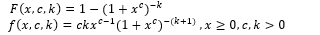
$\tag{10}$

- Consquently, estimated overall roughness of BurrXII distribution, integral of second order derivative (ISD), (derivation is available on the main document). 
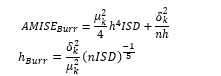$\tag{11}$
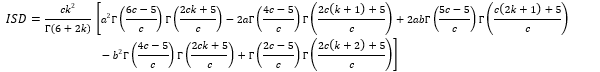$\tag{12}$

Where Γ(.) is gamma function,  $a=(c^2-ck-c), b=4c^2-5ck-10c+k^2+4k+3$. 
- Since c and k are respectively inner and outer  shape parameters estimated for crop's yield understudy elsewhere, it is straightforward to calculate Eq.(8&9). For Epanechikov kernel function where $μ_k=\frac{1}{5},δ_k^2=\frac{2}{5}$
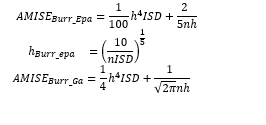 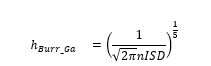$\tag{13}$

## Kernel function and Bandwidth Selection

- In this notebook we considered  guasian and Epanechnikov kernel function which are most efficient kernel functions 

**Gassian Kernel**
$$K(t)= \frac{1}{\sqrt{2\pi}}e^{\frac{-t^2}{2}}$$
**Epanechinkov Kernel**

$$K(x)=\frac{3}{4}(1-t^2), |t|\le1$$

- It has been justifed that bandwidth selection is more important and some what dificult than kernel function selection 

- In `Python 3.8+` package implementation of various Kernel Density Estimators (KDE),three algorithms are implemented through the same API: 
> - `NaiveKDE`:- - A naive computation. Supports $d$-dimensional data, variable bandwidth, weighted data and many kernel functions. Very slow on large data sets.,
> - `TreeKDE`: - A tree-based computation. Supports the same features as the naive algorithm, but is faster at the expense of small inaccuracy when using a kernel without finite support. Good for evaluation on non-uniform, arbitrary grids 
> - `FFTKDE`: - A very fast convolution-based computation. Supports weighted $d$ -dimensional data and many kernels, but not variable bandwidth. Must be evaluated on an equidistant grid, the finer the grid the higher the accuracy. Data points may not be outside the grid. 
The choice of the tuning (smoothing) parameter (bandwidth,`bw`) is more important in the estimation process because most kernel functions are probability density function

- Other potential reference rules are ones based on Information Criteria, such as the well-known ***AIC*** and ***BIC***

- In the **Machine Learning** world, the use of reference rules is less common. 
> - Instead, an empirical approach such as ***cross validation(CV)*** is often used.

- In **CV**, the model is fit to part of the data, and then a quantitative metric is computed to determine how well this model fits the remaining data. Such an empirical approach to model parameter selection is very flexible, and can be used regardless of the underlying data distribution.

- Because the various reference rules generally depend on (often dubious) assumptions about the underlying distribution of the data, bandwidth selection based in **CV** can produce more trustworthy results for real-world datasets.

- A ***leave-one-out (LOO)*** CV scheme is built-in to the Statsmodels `KDEMultivariate` class.

- For large datasets, however, `LOO-CV` can be extremely slow.
- Scikit-learn does not currently provide built-in CV within the `KernelDensity estimator(kde)`, but the standard cross validation tools within the module can be applied quite easily, as shown in the example below.

## Packages and Algorithms in KDE implementation

- The most popular KDe implementations in Python are 

> - SciPy’s gaussian_kde, 
> - Statsmodels’ KDE Univariate,
> - Scikit‑learn’s KernelDensity package and
> - KDEpy by Tommy Odland

- Statsmodels includes a computation based on Fast Fourier Transform (FFT) and normal reference rules for choosing the optimal bandwidth, which Scikit‑ learns package lacks for instance
-  On the other hand, Scikit‑learn includes a 𝑘‑d‑tree based kernel density estimation, which is not available in Statsmodels
- While Scikit‑learn’s tree based approach to compute the kernel density estimation was the most efficient in the vast majority of cases, the new implementation proposed by Tommy Odland in 2018 called KDEpy was able to outperform all previous implementations in terms of run‑ time for a given accuracy by a factor of at least one order of magnitude, using an FFT based approach.
- Additionally it incorporates features of all implementations mentioned before as well as additional kernels and an additional method to calculate the bandwidth using the Improved Sheather Jones (ISJ) algorithm first proposed by Botev et al(ISJ) algorithm first proposed by Botev et al. 
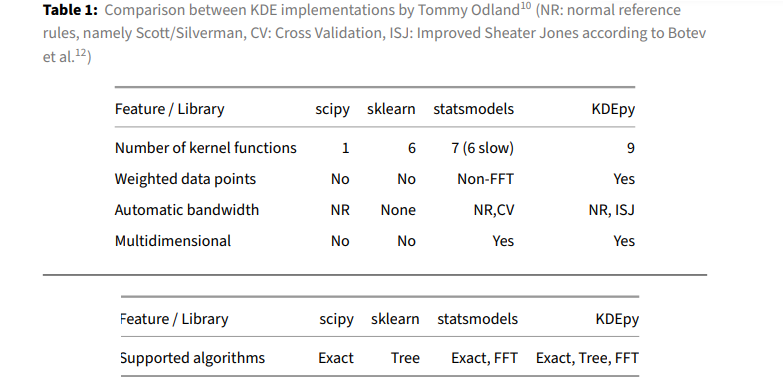

# Data and Some statistics

In [1]:
# imprt some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats, optimize
from conkit.misc import bandwidth
#plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['text.usetex'] = False
rand_seed = 100
crop_yield = pd.read_csv('C:\\Users\\user\\OneDrive\\Desktop\\progress_2\\Crop_yield.csv')
Crop_yield = crop_yield.drop(columns=['Unnamed: 0'],axis=1)
Crop_yield

,Year,Maize_yield,Wheat_yield,Barley_yield,Sorghum_yield,Soybeans_yield,Millet_yield,Peas_yield
0,1961,0.963,0.713,0.800,0.800,1.429,0.483,0.902
1,1962,0.961,0.713,0.800,0.800,1.622,0.483,0.900
2,1963,0.900,0.712,0.800,0.800,1.750,0.483,0.834
3,1964,0.970,0.710,0.810,0.810,1.860,0.495,0.900
4,1965,0.985,0.720,0.820,0.820,1.778,0.500,0.900
5,1966,1.000,0.730,0.830,0.830,2.000,0.495,0.920
6,1967,1.008,0.733,0.842,0.842,2.000,0.497,0.920
7,1968,1.030,0.739,0.839,0.839,2.083,0.504,0.923
8,1969,1.051,0.745,0.851,0.851,2.000,0.507,0.928
9,1970,1.073,0.755,0.858,0.858,2.364,0.509,0.930


In [3]:
Crop_yield.describe()

,Year,Maize_yield,Wheat_yield,Barley_yield,Sorghum_yield,Soybeans_yield,Millet_yield,Peas_yield
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,1990.000000,1.725729,1.343407,1.173678,1.173678,2.116712,1.032288,0.939983
std,17.175564,0.748834,0.610364,0.372827,0.372827,1.160148,0.520499,0.315861
min,1961.000000,0.900000,0.710000,0.800000,0.800000,0.175000,0.483000,0.437000
25%,1975.500000,1.111000,0.892000,0.869500,0.869500,1.019000,0.687000,0.742000
50%,1990.000000,1.620000,1.184000,1.084000,1.084000,2.047000,0.892000,0.900000
75%,2004.500000,1.879000,1.534500,1.327000,1.327000,2.540000,1.137000,1.027000
max,2019.000000,4.237000,2.970000,2.501000,2.501000,5.947000,2.472000,1.746000


Text(0.5, 0.98, 'Histogram plots of crop yileds')

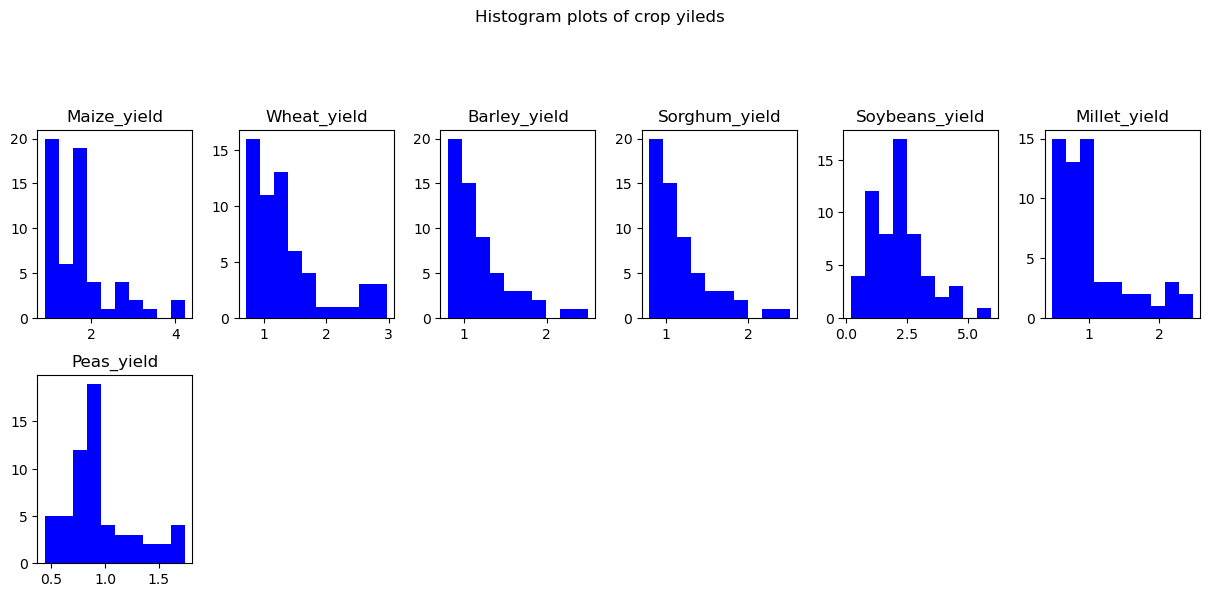

In [4]:
Crop_plot = Crop_yield.drop(columns=['Year'],axis=1)
Crop_plot.hist(layout=(4,6),color ='blue',figsize=(15,12),grid=False)
plt.suptitle('Histogram plots of crop yileds')

Text(0, 0.5, 'Yield in T/ha')

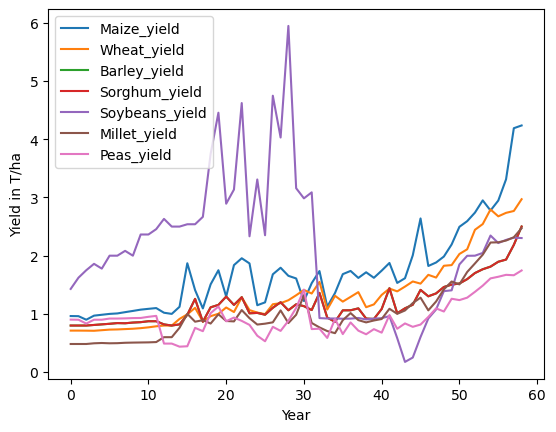

In [5]:
Crop_plot.plot()
plt.xlabel('Year')
plt.ylabel('Yield in T/ha')

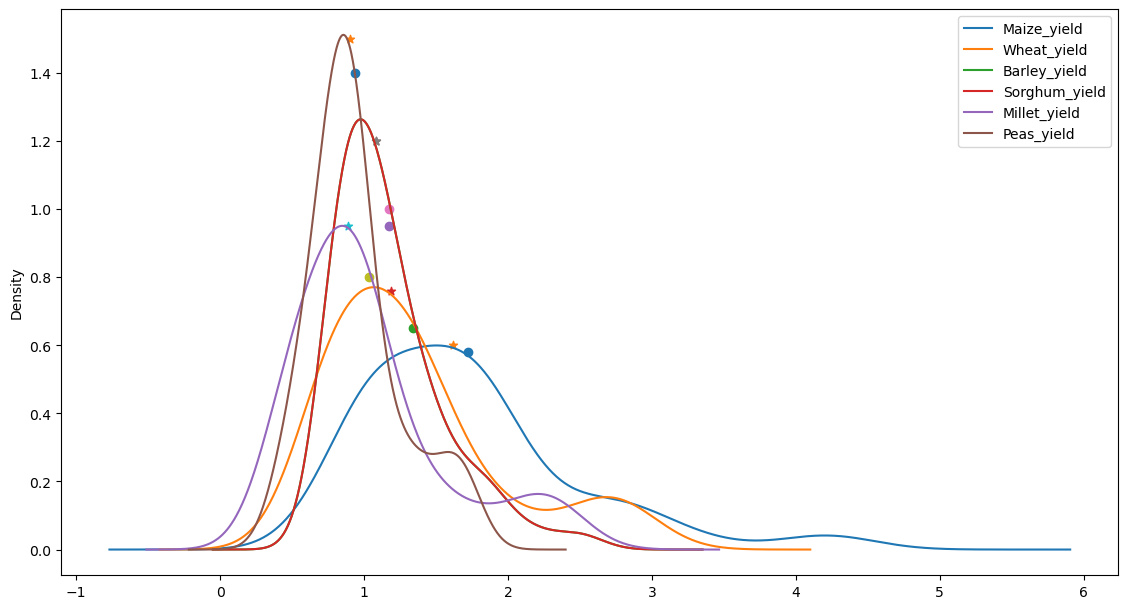

In [6]:
y_m = Crop_yield['Maize_yield']
y_w = Crop_yield['Wheat_yield']
y_b = Crop_yield['Barley_yield']
y_mi = Crop_yield['Millet_yield']
y_sor = Crop_yield['Sorghum_yield']
y_soy = Crop_yield['Soybeans_yield']
y_pea = Crop_yield['Peas_yield']
plt.figure(figsize =(30,25))
plt.subplot(3,2,1)
pd.Series(y_m.plot.kde())
plt.scatter(np.mean(y_m),0.58)
plt.scatter(np.median(y_m),0.6, marker ='*')
pd.Series(y_w.plot.kde())
plt.scatter(np.mean(y_w),0.65)
plt.scatter(np.median(y_w),0.76, marker ='*')
pd.Series(y_b.plot.kde())
plt.scatter(np.mean(y_b),0.95)
plt.scatter(np.median(y_b),1.2, marker ='*')
pd.Series(y_sor.plot.kde())
plt.scatter(np.mean(y_sor),1.0)
plt.scatter(np.median(y_sor),1.2, marker ='*')
pd.Series(y_mi.plot.kde())
plt.scatter(np.mean(y_mi),0.8)
plt.scatter(np.median(y_mi),0.95, marker ='*')
#plt.title('Millet yield (t/ha)')
#plt.subplot(3,2,1)
pd.Series(y_pea.plot.kde())
plt.scatter(np.mean(y_pea),1.4)
plt.scatter(np.median(y_pea),1.5, marker ='*')
#plt.title('Pea yield (t/ha)')
plt.legend()

- Above plot signifies that most of crop yield's distribution demonstraites at least a bimodal distribution. 
- We separately examine nature of density plot of Maize and Wheat yields below as showcase.  

Text(0, 0.5, 'Density')

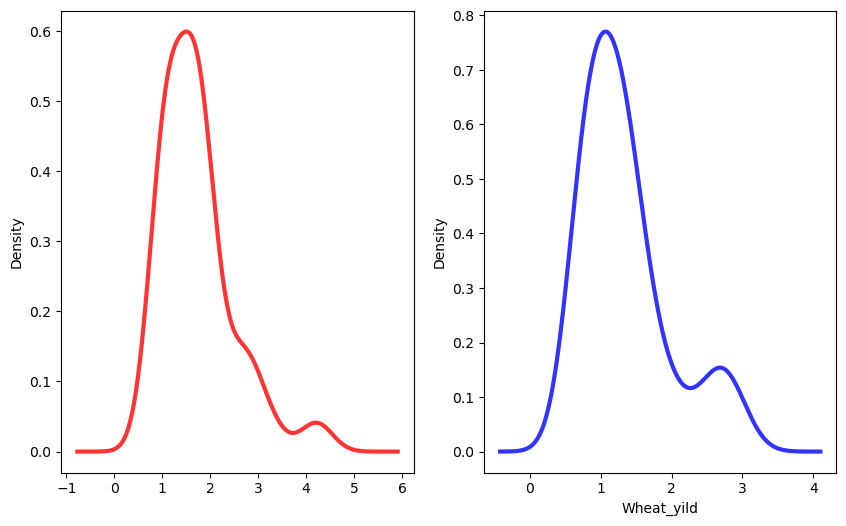

In [7]:
import seaborn as sns
f,ax =plt.subplots(1,2, figsize=(10, 6))
#Crop_yield['Maize_yield'].plot.density(figsize = (8,3), linewidth = 3,alpha=0.8) 
y_m.plot.density(linewidth = 3,alpha=0.8, color='r',label ='Maize yield_Tpha',ax=ax[0])
plt.xlabel('Maize_yild')
y_w.plot.density(linewidth = 3,alpha=0.8,color='b',label ='Wheat yield_Tph',ax=ax[1])
plt.xlabel('Wheat_yild')
plt.ylabel("Density")
#plt.xlabel(" Maize yield_Tpha")
#Crop_yield['Wheat_yield'].plot.density(figsize = (8,3), linewidth = 3,alpha=0.8) 
#plt.xlabel(" Wheat yield_Tpha")

Text(0.5, 0, ' Wheat yield_Tpha')

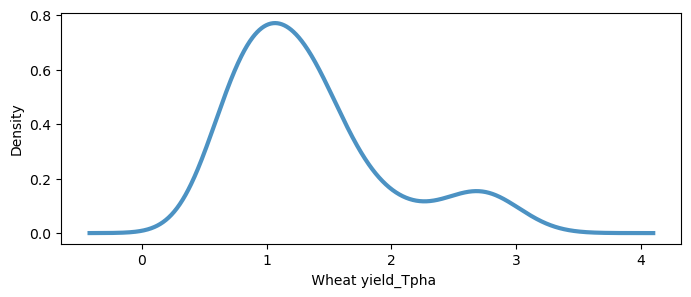

In [8]:
Crop_yield['Wheat_yield'].plot.density(figsize = (8,3), 
                       linewidth = 3,alpha=0.8) 
plt.xlabel(" Wheat yield_Tpha")

## Spliting  Multimodal Distribution 

- Dueto effect of different factors  factors, getting  multimodal distribution of a crop yield is natural phenomenon

- An important concern is here is to know if there are methods to itect the number of peaks(cluster centroids) and optimally split the observation arround them. 

- Among  multiple ways to determine the optimization criterion inludes
> - Normal Distribution
> - Multi-variate Analysis
> - multi-variate- normal distribution 

- Multimodal  distribution has its characterstics as a statitstical phenomenen that often arises when a dataset exhibits more than one distinct peak or mode, with eavh mode representing a prominent  cluster or concentration of data points within.

- separating the multimodal distribution into n normal distribution then performed by retriving the mean and standard deviationfor each distribution using a `Gausian Mixture Model (GMM)`.

- GMM is a probablstic  unsupervised  model which can be used for clustering  data. It estimates density regions using the `expectation maximization (EM)`.

-  One can think of mixture model as generalzing  `k-means clustering` to incorporate information about the covariance structure of the latent Gausians.
- `sckit-learn` implements different class to estimate Gaussian mixture models including
> - `GaussianMixture`model (GMM)
> - `BayesianGaussianMixture`model(BGM)

- While `BGM` is based on ***variation inference (VI)*** algortihm, `GMM`is based on ***expectation maximization (EM)***, in this notebook latter is emphasized with procedures adapted from [medium post](https://medium.com/@adev94/how-to-split-multimodal-distribution-with-gaussian-mixture-models-in-python-c87957553e4) by [Adrian Versen](https://medium.com/@adev94?source=post_page-----c87957553e4--------------------------------)

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
Maize_yield = Crop_yield['Maize_yield']
gmm.fit(Crop_yield['Maize_yield'].values.reshape(-1, 1))
Maize_yield['Maize_yield_class'] = gmm.predict(Crop_yield['Maize_yield'].values.reshape(-1, 1))
means_m = gmm.means_
# Conver covariance into Standard Deviation
standard_deviations_m = gmm.covariances_**0.5  
# Useful when plotting the distributions later
weights_m = gmm.weights_  
print(f"Means:", means_m,'\n' "Standard Deviations:",standard_deviations_m,'\n'"Weights",weights_m)

C:\Users\user\AppData\Local\Temp\ipykernel_9976\1362789138.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Maize_yield['Maize_yield_class'] = gmm.predict(Crop_yield['Maize_yield'].values.reshape(-1, 1))


Means: [[1.05164905]
 [1.70141672]
 [2.84282619]] 
Standard Deviations: [[[0.08229247]]

 [[0.18953178]]

 [[0.74826916]]] 
Weights [0.33287609 0.4563282  0.21079571]


In [10]:
#Split for wheat yield
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
Wheat_yield = Crop_yield['Wheat_yield']
gmm.fit(Crop_yield['Wheat_yield'].values.reshape(-1, 1))
Wheat_yield['Wheat_yield_class'] = gmm.predict(Crop_yield['Wheat_yield'].values.reshape(-1, 1))
means_w = gmm.means_
# Conver covariance into Standard Deviation
standard_deviations_w = gmm.covariances_**0.5  
# Useful when plotting the distributions later
weights_w = gmm.weights_  
print(f"Means:", means_w,'\n' "Standard Deviations:",standard_deviations_w,'\n'"Weights",weights_w)

Means: [[2.57179009]
 [1.1295757 ]] 
Standard Deviations: [[[0.30477301]]

 [[0.32468906]]] 
Weights [0.14826581 0.85173419]


C:\Users\user\AppData\Local\Temp\ipykernel_9976\2906378420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wheat_yield['Wheat_yield_class'] = gmm.predict(Crop_yield['Wheat_yield'].values.reshape(-1, 1))


- Now that we have obtained the means and standard deviations for maize yield by decomposing it into three clusturs assuming minimum, most likely and maximum yield outputs.
- Now lets use a one-dimensional array generated with numpy.

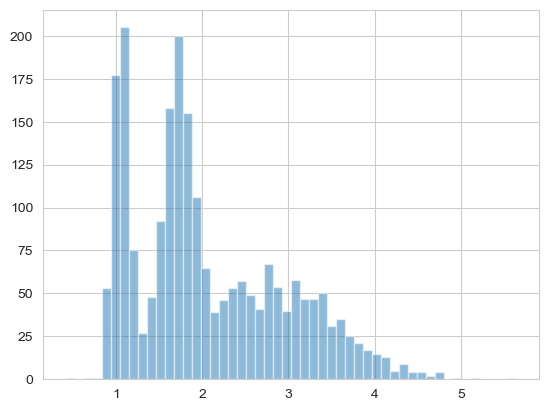

In [12]:
import numpy as np
dist_1 = np.random.normal(2.81552706, 0.76023162, 1000)
dist_2 = np.random.normal(1.70786162, 0.17857037, 700)
dist_3 = np.random.normal(1.05608721, 0.08707641, 500)
multimodal_dist = np.concatenate((dist_1, dist_2, dist_3), axis=0)
#Let’s visualize our one-dimensional data distribution.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.hist(multimodal_dist, bins=50, alpha=0.5)
plt.show()

- In the above plot sample only simulated equaly, but we alternatively varied weighs instead as follow for fixed sample size

C:\Users\user\AppData\Local\Temp\ipykernel_9976\1280684424.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples)


<Axes: ylabel='Density'>

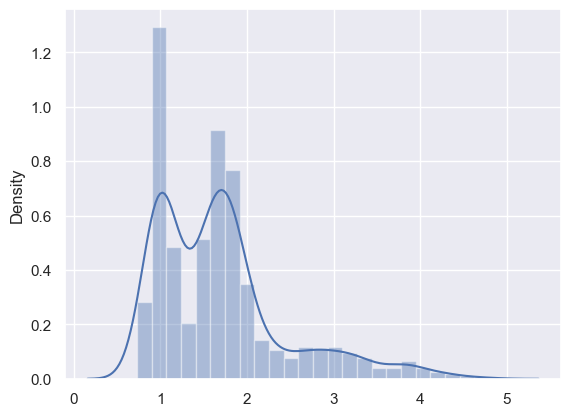

In [13]:
from itertools import starmap
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import mlab
sns.set(color_codes=True)
# inline plots in jupyter notebook
%matplotlib inline
# generate synthetic data from a mixture of two Gaussians with equal weights
# the solution below readily generalises to more components 
nsamples = 1000
means = [2.81, 1.70,1.0]
sds = [0.76,0.18, 0.09]
weights = [0.22, 0.44,0.34] # depending on the ean value
draws = np.random.multinomial(nsamples, weights)
samples = np.concatenate(
    list(starmap(np.random.normal, zip(means, sds, draws)))
)
sns.distplot(samples)

**Infer parameter of each parameters**

In [14]:
from sklearn.mixture import GaussianMixture
from scipy.stats import norm
mixture = GaussianMixture(n_components=3).fit(samples.reshape(-1, 1))
means_hat = mixture.means_.flatten()
weights_hat = mixture.weights_.flatten()
sds_hat = np.sqrt(mixture.covariances_).flatten()
print(mixture.converged_)
print(means_hat)
print(sds_hat)
print(weights_hat)

True
[0.99771345 2.99563285 1.70196575]
[0.09229197 0.66875868 0.21333929]
[0.34290158 0.17772359 0.47937482]


- We can tweak GaussianMixture's hyper-parameters to improve fit, but this looks fine enough.

- Now we can plot each component 

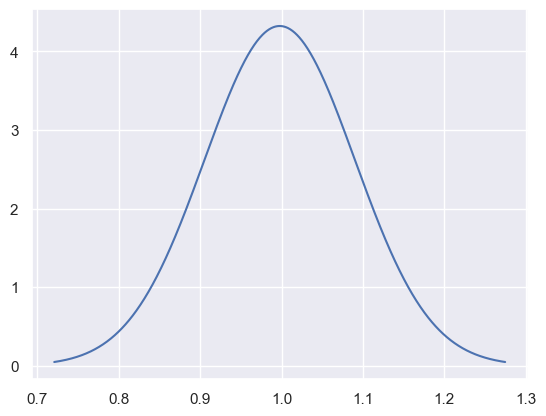

In [15]:
# plot for first case
mu1_h, sd1_h = means_hat[0], sds_hat[0]
x_axis = np.linspace(mu1_h-3*sd1_h, mu1_h+3*sd1_h, 1000)
plt.plot(x_axis, norm.pdf(x_axis, mu1_h, sd1_h))

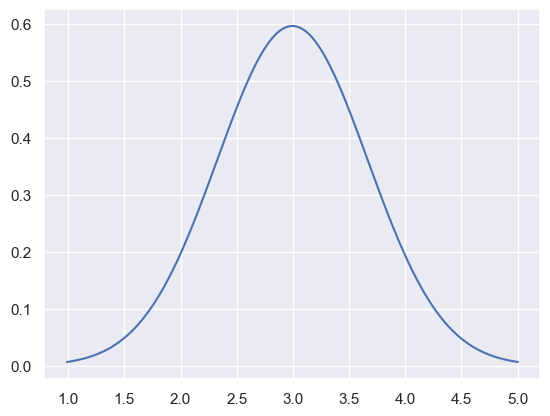

In [16]:
# plot for second case
mu2_h, sd2_h = means_hat[1], sds_hat[1]
x_axis = np.linspace(mu2_h-3*sd2_h, mu2_h+3*sd2_h, 1000)
plt.plot(x_axis, norm.pdf(x_axis, mu2_h, sd2_h))

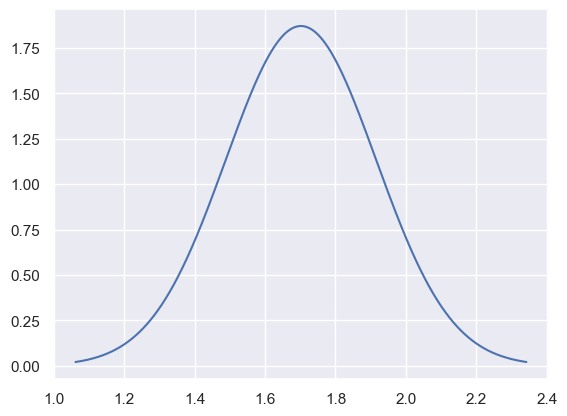

In [17]:
# plot for third case
mu3_h, sd3_h = means_hat[2], sds_hat[2]
x_axis = np.linspace(mu3_h-3*sd3_h, mu3_h+3*sd3_h, 1000)
plt.plot(x_axis, norm.pdf(x_axis, mu3_h, sd3_h))

# Evalauet Kernel function and Bandwidth selection methods

- So far we demonstraited density plot for maize and wheat using gausian and epanechnikov kernel function using numpy function and `KernelDensity` algorithm from `sciket learn` package 

- It has been devised to assume underlying distribution of a random variable at which normal distribution is being mostly used to apply reference rule. Using result from  parametric approach of crop yield modeling at which BurrXII distribution reported as best fit distribution in another study of the author, we compared various kernel function and bandwidth selection methods for maize and wheta yield as follow

## Generate some datasets for testing
- Four datasets, each containing 100 randomly selected data points drawn from  normal and burrXII distribution using crop yield sample data. 

 1. Normal distribution for Maize and Wheta yield
 2. BurrXII Distribution  for maize and wheat yield
 
- In general for distribution models, two for each crop yiled, examined using paramters of the dataset

**Recall from multimodl spliting**

 > - Means_m: `[[1.71][2.81][1.06]] `

 > - Standard Deviations_m: `[[0.18][0.76][0.09]]` 

 > - Weights_m `[0.44, 0.22 0.34]`
 
 > - Means_w: `[[1.13 ] [2.57]] `

> - Standard Deviations_w: `[[0.3][0.39]]` 

> - Weights `[0.85 0.15]`

- For the sak of computation we rounded of values to integer

In [21]:
Y_m =y_m.values.reshape(-1,1)
Y_w =y_w.values.reshape(-1,1)

In [22]:
def Maize_normal(data_count=59):
    np.random.seed(rand_seed)
    x = np.random.normal(np.mean(Y_m), np.std(Y_m), data_count)
    dist = lambda z: stats.norm(np.mean(Y_m), np.std(Y_m)).pdf(z)
    return x, dist
def Maize_multinormal(data_count=59):
    w_m1,w_m2,w_m3 = 0.44, 0.22, 0.34
    np.random.seed(rand_seed)
    x = np.concatenate([np.random.normal(1.71, 0.81, int(data_count*w_m1)),
                        np.random.normal(2.81, 0.76,int(data_count*w_m2)),
                        np.random.normal(1.06,0.09, int(data_count*w_m3))])
    dist = lambda z: w_m1*stats.norm(1.71, 0.81).pdf(z)+w_m2*stats.norm(2.81, 0.76).pdf(z)+w_m3*stats.norm(1.06,0.09).pdf(z) 
    return x, dist
m_norm, distm_norm = Maize_normal()
m_mnorm, distm_mnorm = Maize_multinormal()

In [23]:
def Wheat_normal(data_count=59):
    np.random.seed(rand_seed)
    x = np.random.normal(np.mean(Y_w), np.std(Y_w), data_count)
    dist = lambda z: stats.norm(np.mean(Y_w), np.std(Y_w)).pdf(z)
    return x, dist
def Wheat_binormal(data_count=59):
    w_w1,w_w2 = 0.85, 0.15
    np.random.seed(rand_seed)
    x = np.concatenate([np.random.normal(1.13, 0.3, int(data_count*w_w1)),
                        np.random.normal(2.57, 0.39, int(data_count*w_w2))])
    dist = lambda z: w_w1*stats.norm(1, 0).pdf(z)+w_w2*stats.norm(3, 0).pdf(z)
    return x, dist
w_norm, distw_norm = Wheat_normal()
w_binorm, distw_binorm = Wheat_binormal()

In [24]:
def _select_sigma(x):
    normalizer = 1.349
    iqr = (stats.scoreatpercentile(x, 75) - stats.scoreatpercentile(x, 25)) / normalizer
    std_dev = np.std(x, axis=0, ddof=1)
    return np.minimum(std_dev, iqr) if iqr > 0 else std_dev
def bw_scott(data: np.ndarray):
    std_dev = np.std(data, axis=0, ddof=1)
    n = len(data)
    return 1.059 * std_dev * n ** (-0.2)
def bw_silverman(data: np.ndarray):
    sigma = _select_sigma(data)
    n = len(data)
    return 0.9 * sigma * n ** (-0.2)
def bw_mlcv(data: np.ndarray, k):
    n = len(data)
    x = np.linspace(np.min(data), np.max(data), n)
    def mlcv(h):
        fj = np.zeros(n)
        for j in range(n):
            for i in range(n):
                if i == j: continue
                fj[j] += k((x[j] - data[i]) / h)
            fj[j] /= (n - 1) * h
        return -np.mean(np.log(fj[fj > 0]))
    h = optimize.minimize(mlcv, 1)
    if np.abs(h.x[0]) >= 100: # Fail fallback
        return bw_scott(data)
    return h.x[0]
def bw_amise(data: np.ndarray):
    # Using the AmiseBW from ConKit for AMISE.
    return bandwidth.AmiseBW((1e4 * data[:,None]).astype(np.int64)).bandwidth / 1e4

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
names = ['Maize_normal','Maize_mulitnoral', 'Wheat_normal','Wheat_binormal']
for i, d in enumerate([distm_norm, distm_mnorm,distw_norm,distw_binorm]):
    x = np.linspace(0, 8, 59)
    ax[i].fill(x, d(x), color='C0', alpha=0.5)
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(0, 8)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('p(x)')
    ax[i].set_title(names[i])
fig.tight_layout()
#fig.show()

## Define some kernel functions

- The probability of selecting a value of $x$ at each sample attempt is represented by $p(x)$
- Four common kernel functions: 
> - gaussian, 
> - epanechnikov, 
> - cosine, and 
> - linear.

- It’s also worth noting that the choice of the kernel function is not as important for the performance of KDE as the bandwidth. 

In [26]:
def kernel(k: str):
    """Kernel Functions.
    Ref: https://en.wikipedia.org/wiki/Kernel_(statistics)
    Args:
        k (str): Kernel name. Can be one of ['gaussian', 'epanechnikov', 'cosine', 'linear'.]
    """
    
    if k not in ['gaussian', 'epanechnikov', 'cosine', 'linear']:
        raise ValueError('Unknown kernel.')
    def bounded(f):
        def _f(x):
            return f(x) if np.abs(x) <= 1 else 0
        return _f
    if k == 'gaussian':
        return lambda u: 1 / np.sqrt(2 * np.pi) * np.exp(-1 / 2 * u * u)
    elif k == 'epanechnikov':
        return bounded(lambda u: (3 / 4 * (1 - u * u)))
    #elif k =='cosine':
        #return bounded(lambda u: np.pi / 4 * np.cos(np.pi / 2 * u))
    #elif k == 'linear':
        #return bounded(lambda u: 1 - np.abs(u))
def kde(data, k=None, h=None, x=None):
    """Kernel Density Estimation.

    Args:
        data (np.ndarray): Data.
        k (function): Kernel function.
        h (float): Bandwidth.
        x (np.ndarray, optional): Grid. Defaults to None.

    Returns:
        np.ndarray: Kernel density estimation.
    """
    if x is None:
        x = np.linspace(np.min(data), np.max(data), 100)
    if h is None:
        h = bw_silverman(data)
    if k is None:
        k = kernel('gaussian')
    n = len(data)
    kde = np.zeros_like(x)
    for j in range(len(x)):
        for i in range(n):
            kde[j] += k((x[j] - data[i]) / h)
        kde[j] /= n * h
    return kde

- Here we consider three methods like: 
> - ***Scott’s rule of thumb***, 
> - ***Silverman’s rule of thumb*** and 
> - ***MLCV (Maximum Likelihood Cross Validation) method***.

As shown in the code,

> - `Scott’s` rule of thumb is formulated as: $h = 3.49.s.n^{-1/3}$;
> - `Silverman’s` rule of thumb is formulated as: $h = 0.9.min(s, \frac{\text{IQR}} {1.349}).n ^{-1/5}$. While IQR is the interquartile range, s is the standard deviation of observed data, and n is the number of samples. 
> - For `MLCV` method, the goal is to maximize the likelihood of estimated data calculated from ***leave-one-out(LOO)*** estimator

- AMISE, Taylor bootstrap method, DO-validation, are also among other methods for choosing the optimal bandwidth. 

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\anaconda3\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\user

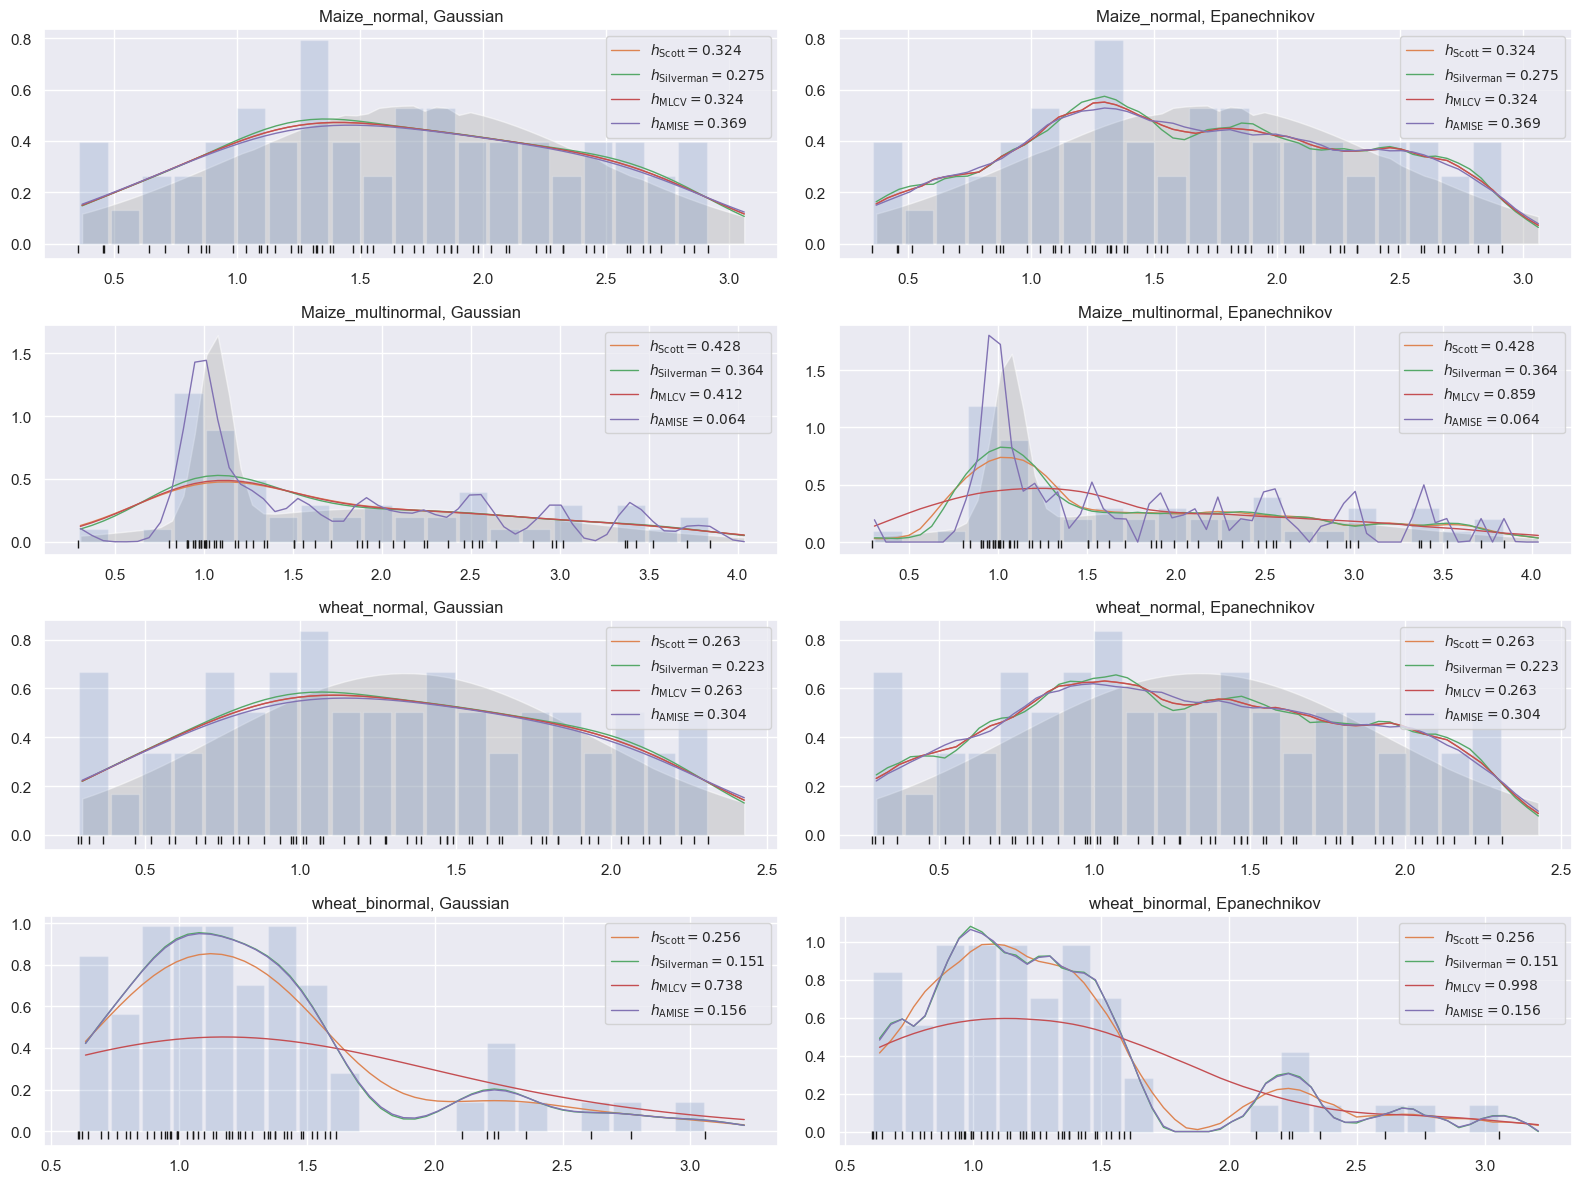

In [27]:
data = [
    ('Maize_normal', Maize_normal),
    ('Maize_multinormal', Maize_multinormal),
    ('wheat_normal', Wheat_normal),
    ('wheat_binormal', Wheat_binormal)
]
kernels = [
    ('Gaussian', kernel('gaussian')),
    ('Epanechnikov', kernel('epanechnikov'))
    #('Cosine', kernel('cosine')),
    #('Linear', kernel('linear'))
]
bw_algorithms = [
    ('Scott', bw_scott),
    ('Silverman', bw_silverman),
    ('MLCV', bw_mlcv),
    ('AMISE', bw_amise)
]
mses = []

def run_kde(ax, data, kernel):
    x, dist = data[1]()
    x_plot = np.linspace(np.min(x) * 1.05, np.max(x) * 1.05, 59)
    ax.grid(True)
    ax.fill_between(x_plot, dist(x_plot), fc='silver', alpha=0.5)
    ax.plot(x, np.full_like(x, -0.02), '|k', markeredgewidth=1)
    ax.hist(x, density=True, alpha=0.2, bins=20, rwidth=0.9)
    for bw in bw_algorithms:
        if bw[0] == 'MLCV':
            h = bw[1](x, kernel[1])
        else:
            h = bw[1](x)
        x_kde = kde(x, kernel[1], h=h, x=x_plot)
        mse = np.mean((dist(x_plot) - x_kde) ** 2)
        mses.append({
            'data': data[0],
            'kernel': kernel[0],
            'bw_algorithm': bw[0],
            'h': round(h, 3),
            'mse': round(mse * 1000, 3),
        })
        ax.plot(x_plot, x_kde, linewidth=1, label='$h_{\mathrm{' + bw[0] + '}} = ' + str(round(h, 3)) + '$')
    ax.legend(loc='best', fontsize='small')
    ax.set_title(f'{data[0]}, {kernel[0]}')

fig, axs = plt.subplots(len(data), len(kernels), figsize=(16, 12))
for i, d in enumerate(data):
    for j, k in enumerate(kernels):
        run_kde(axs[i, j], d, k)
    for bw in bw_algorithms:
        avg_h = np.mean([m['h'] for m in mses if m['data'] == d[0] and m['bw_algorithm'] == bw[0]])
        avg_mse = np.mean([m['mse'] for m in mses if m['data'] == d[0] and m['bw_algorithm'] == bw[0]])
        mses.append({
            'data': d[0],
            'kernel': '-',
            'bw_algorithm': bw[0],
            'h': round(avg_h, 3),
            'mse': round(avg_mse, 3),
        })

fig.tight_layout()
#fig.savefig('./kde.svg')
pd.DataFrame(mses).to_csv('C://Users//user//OneDrive//Desktop//progress_2//statistics.csv', index=False)

In [28]:
Stat = pd.DataFrame(mses)
Stat

,data,kernel,bw_algorithm,h,mse
0,Maize_normal,Gaussian,Scott,0.324,2.585
1,Maize_normal,Gaussian,Silverman,0.275,2.742
2,Maize_normal,Gaussian,MLCV,0.324,2.585
3,Maize_normal,Gaussian,AMISE,0.369,2.596
4,Maize_normal,Epanechnikov,Scott,0.324,4.291
5,Maize_normal,Epanechnikov,Silverman,0.275,5.009
6,Maize_normal,Epanechnikov,MLCV,0.324,4.291
7,Maize_normal,Epanechnikov,AMISE,0.369,3.810
8,Maize_normal,-,Scott,0.324,3.438
9,Maize_normal,-,Silverman,0.275,3.876


 - As it is reported, application of parametric approach for density estimation  of crop yield like maize and wheat, better performs if underlying distribution is normal. 
 - With normal distribution assumption, compresion of kernel function might be based on MSE at whcih `Scott's` and `MLCV` algorithms confirmed a relatively small MSE with gausian kernel function for maize yield and wheat yield. 

**Apply Cross Validation**

In [29]:
import numpy as np
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
import matplotlib.pyplot as plt
data_m = Crop_yield['Maize_yield'].values
data_w = Crop_yield['Wheat_yield'].values

grid.best_params_: {'bandwidth': 0.5}


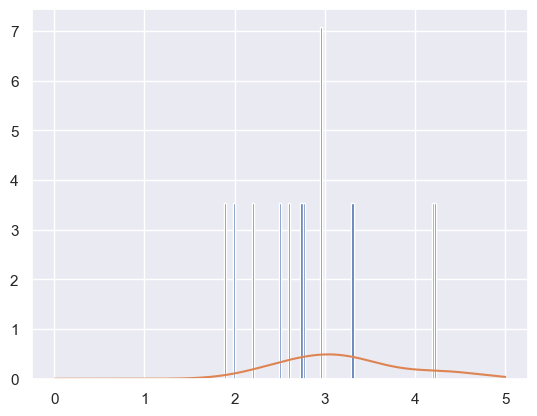

In [30]:
data_m= data_m.reshape(-1,1)
data_w = data_w.reshape(-1,1)
nsamp=59
#seperate into validation and training
val_data = data_m[0:int(nsamp*0.2)]
val_data =val_data.reshape(-1,1)
train_data = data_m[int(nsamp*0.8):]
train_data=train_data.reshape(-1,1)
#look at the data with a histogram
plt.hist(train_data,bins=100, density=True)
#1. now do the KDE with Gaussian kernel with cross validation
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': np.linspace(0.01, 0.5, 2)}, cv=5) 
grid.fit(train_data)
print("grid.best_params_: " + str(grid.best_params_))
#get the best estimator
kde_gauss=grid.best_estimator_
##to play arounf and see the effects of changing the bandwidth
#kde_gauss = KernelDensity(kernel='gaussian', bandwidth=0.1)
#kde_gauss.fit(train_data)
#what is the likelihood of validation data
kde_gauss.score(val_data)
#look at the fitted pdf
plt.plot(np.linspace(0,5,1000), np.exp(kde_gauss.score_samples(np.reshape(np.linspace(-1,5,1000),(1000,1)) )))

grid_g.best_params_m: {'bandwidth': 0.875}
grid_e.best_params_m: {'bandwidth': 1.0}
grid_g.best_params_w: {'bandwidth': 0.5}
grid_e.best_params_w: {'bandwidth': 1.0}


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       -inf        -inf        -inf        -inf -4.01319266]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


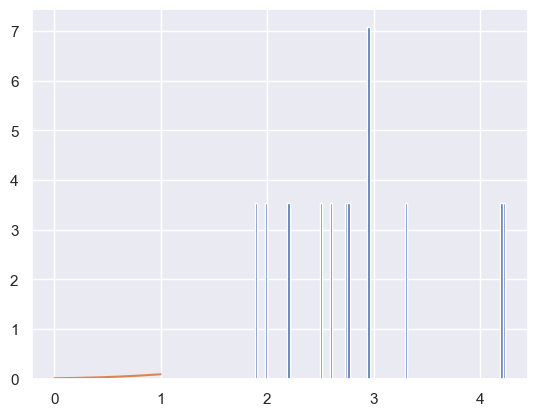

In [31]:
nsamp=59
#seperate into validation and training
val_m = data_m[0:int(nsamp*0.2)]
train_m = data_m[int(nsamp*0.8):]
val_w = data_w[0:int(nsamp*0.2)]
train_w = data_w[int(nsamp*0.8):]
#look at the data with a histogram
plt.hist(train_m,bins=100, density=True)
#1. now do the KDE with Gaussian kernel with cross validation
grid_gm = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': np.linspace(0.5, 1, 5)}, cv=5) 
grid_em = GridSearchCV(KernelDensity(kernel='epanechnikov'),{'bandwidth': np.linspace(0.5, 1, 5)}, cv=5) 
grid_gw = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': np.linspace(0.5, 1, 5)}, cv=5) 
grid_ew = GridSearchCV(KernelDensity(kernel='epanechnikov'),{'bandwidth': np.linspace(0.5, 1, 5)}, cv=5) 
grid_gm.fit(train_m)
grid_em.fit(train_m)
grid_gw.fit(train_w)
grid_ew.fit(train_w)
print("grid_g.best_params_m: " + str(grid_gm.best_params_))
print("grid_e.best_params_m: " + str(grid_em.best_params_))
print("grid_g.best_params_w: " + str(grid_gw.best_params_))
print("grid_e.best_params_w: " + str(grid_ew.best_params_))
#get the best estimator
kde_ga_m=grid_gm.best_estimator_
kde_epa_m=grid_em.best_estimator_
kde_ga_w=grid_gw.best_estimator_
kde_epa_w=grid_ew.best_estimator_
##to play arounf and see the effects of changing the bandwidth
#kde_gauss = KernelDensity(kernel='gaussian', bandwidth=0.1)
#kde_gauss.fit(train_data)
#what is the likelihood of validation data
kde_ga_m.score(val_m)
kde_epa_m.score(val_m)
kde_ga_w.score(val_w)
kde_epa_w.score(val_w)
#look at the fitted pdf
plt.plot(np.linspace(0,1,1000), np.exp(kde_ga_m.score_samples(np.reshape(np.linspace(0,1,1000),(1000,1)) )))

In [32]:
#Split dataset and train models using each kernel and bandwidth obtained 
train_arr_m = np.array(train_m).reshape(-1, 1)
kde_m = KernelDensity(bandwidth = 0.75).fit(train_arr_m)# bandwidth using gausian 
train_arr_w= np.array(train_w).reshape(-1, 1)
kde_w = KernelDensity(bandwidth = 0.5).fit(train_arr_w)

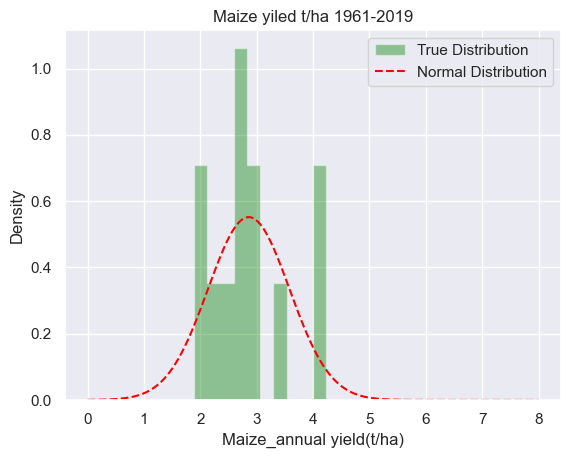

In [33]:
def normal_pdf(x, mu_m, sigma_m):
    '''
    Quick function hacked together to calculated the Normal distribution PDF based on 
    provided data, x, mean value mu, and standard deviation value sigma.
    '''
    return np.exp(-(x - mu_m)**2 / (2 * sigma_m ** 2)) / (sigma_m * np.sqrt(2 * np.pi))

mu_m, sigma_m = train_m.mean(), train_m.std()  # training returns mean & std
xs_m = np.linspace(0, 8, 1000)                    # x's between -0.06 to +0.06

plt.hist(train_m, density=True, color='green', bins=10,   # draw the original histogram
         alpha=0.4, histtype='stepfilled', label='True Distribution')

plt.plot(xs_m, normal_pdf(xs_m, mu_m, sigma_m),                # plot out the PDF in red
         color='red', linestyle='--', label='Normal Distribution')
plt.title('Maize yiled t/ha 1961-2019')
plt.ylabel('Density')
plt.xlabel('Maize_annual yield(t/ha)')
plt.legend(loc='best');

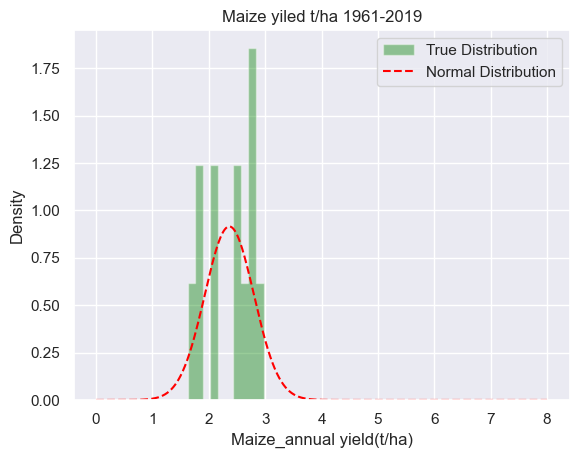

In [34]:
def normal_pdf(x, mu_w, sigma_w):
    '''
    Quick function hacked together to calculated the Normal distribution PDF based on 
    provided data, x, mean value mu, and standard deviation value sigma.
    '''
    return np.exp(-(x - mu_w)**2 / (2 * sigma_w ** 2)) / (sigma_w * np.sqrt(2 * np.pi))

mu_w, sigma_w = train_w.mean(), train_w.std()  # training returns mean & std
xs_w = np.linspace(0, 8, 1000)                    # x's between -0.06 to +0.06

plt.hist(train_w, density=True, color='green', bins=10,   # draw the original histogram
         alpha=0.4, histtype='stepfilled', label='True Distribution')

plt.plot(xs_w, normal_pdf(xs_w, mu_w, sigma_w),                # plot out the PDF in red
         color='red', linestyle='--', label='Normal Distribution')

plt.title('Maize yiled t/ha 1961-2019')
plt.ylabel('Density')
plt.xlabel('Maize_annual yield(t/ha)')
plt.legend(loc='best');

In [35]:
from sklearn.model_selection import GridSearchCV
params_m = {
    'bandwidth' : np.linspace(0.001,5, 10),          # optimize bandwidth
    'kernel': ['gaussian', 'epanechnikov', 'exponential','tophat']  # and kernel type
         }
grid_m = GridSearchCV(KernelDensity(), 
                    param_grid=params_m, 
                    cv=10,                        # 5 cross validation runs
                   n_jobs=-1).fit(train_arr_m)
params_w = {
    'bandwidth' : np.linspace(0.001,5, 10),          # optimize bandwidth
    'kernel': ['gaussian', 'epanechnikov', 'exponential']  # and kernel type
         }
grid_w = GridSearchCV(KernelDensity(), 
                    param_grid=params_w, 
                    cv=10,                        # 5 cross validation runs
                   n_jobs=-1).fit(train_arr_w)
grid_m.best_params_,grid_w.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-1.69715528e+04            -inf -1.40776962e+02            -inf
 -1.51979457e+00 -1.56402965e+00 -1.55677348e+00 -1.57484028e+00
 -1.68009687e+00 -1.51534705e+00 -1.78358792e+00 -1.56149612e+00
 -1.94340086e+00 -1.54618518e+00 -2.02256543e+00 -1.62490171e+00
 -2.19541347e+00 -1.65019871e+00 -2.23408813e+00 -1.85273431e+00
 -2.41679245e+00 -1.77849237e+00 -2.41830187e+00 -2.05795010e+00
 -2.60943701e+00 -1.92812002e+00 -2.57994896e+00 -2.27666398e+00
 -2.77831944e+00 -2.07413766e+00 -2.72340132e+00 -2.46159337e+00
 -2.92796835e+00 -2.21004052e+00 -2.85209655e+00 -2.62179247e+00
 -3.06198245e+00 -2.33509434e+00 -2.96866623e+00 -2.76310211e+00]
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -
C:\Users\us

({'bandwidth': 1.1118888888888887, 'kernel': 'epanechnikov'},
 {'bandwidth': 0.5564444444444444, 'kernel': 'epanechnikov'})

**Refiting with bandwidths**

1. Refit with best bandwidth from Grid_Cross validation

In [36]:
# Refit with best bandwidth from Grid_Cross validation
xs_m = np.linspace(0.01, 8, 1000)
xs_w = np.linspace(0.01, 8, 1000)
best_kde_m = KernelDensity(bandwidth=grid_m.best_params_['bandwidth']).fit(train_arr_m)
log_probs_m = best_kde_m.score_samples(xs_m.reshape(-1,1))
best_kde_pdf_m = np.exp(log_probs_m)
best_kde_w = KernelDensity(bandwidth=grid_w.best_params_['bandwidth']).fit(train_arr_w)
log_probs_w = best_kde_w.score_samples(xs_w.reshape(-1,1))
best_kde_pdf_w = np.exp(log_probs_w)

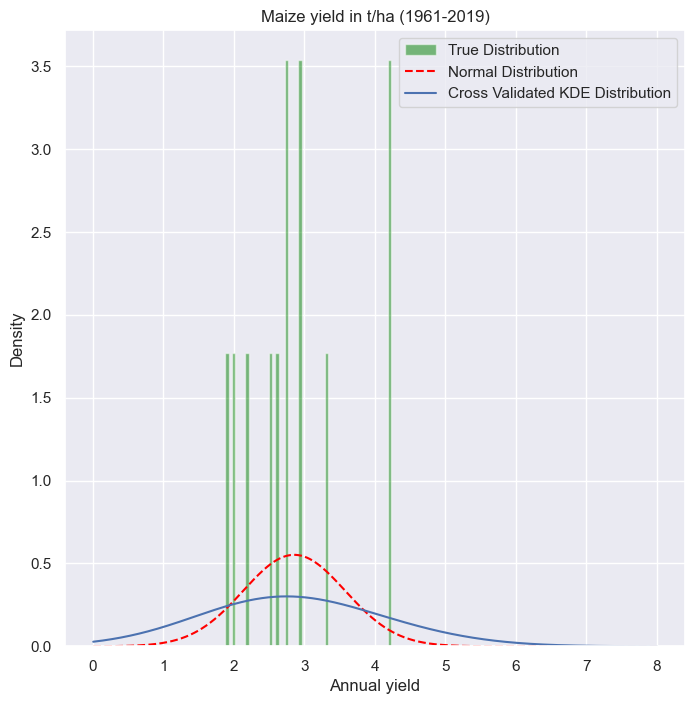

In [37]:
plt.subplots(figsize=(8,8))
plt.hist(train_m, density=True, color='green', 
         bins=50, alpha=0.5, histtype='stepfilled', label='True Distribution')
plt.plot(xs_m, normal_pdf(xs_m, mu_m, sigma_m), color='red', 
         linestyle='--', label='Normal Distribution')
plt.plot(xs_m, best_kde_pdf_m, label='Cross Validated KDE Distribution')
plt.title('Maize yield in t/ha (1961-2019)')
plt.ylabel('Density')
plt.xlabel('Annual yield')
plt.legend(loc='best');

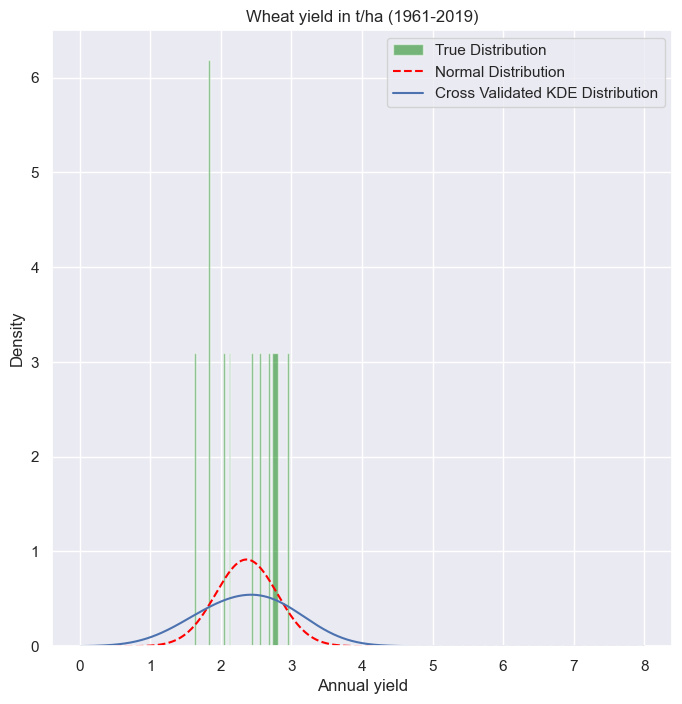

In [38]:
plt.subplots(figsize=(8,8))
plt.hist(train_w, density=True, color='green', 
         bins=50, alpha=0.5, histtype='stepfilled', label='True Distribution')
plt.plot(xs_w, normal_pdf(xs_w, mu_w, sigma_w), color='red', 
         linestyle='--', label='Normal Distribution')
plt.plot(xs_w, best_kde_pdf_w, label='Cross Validated KDE Distribution')
plt.title('Wheat yield in t/ha (1961-2019)')
plt.ylabel('Density')
plt.xlabel('Annual yield')
plt.legend(loc='best');

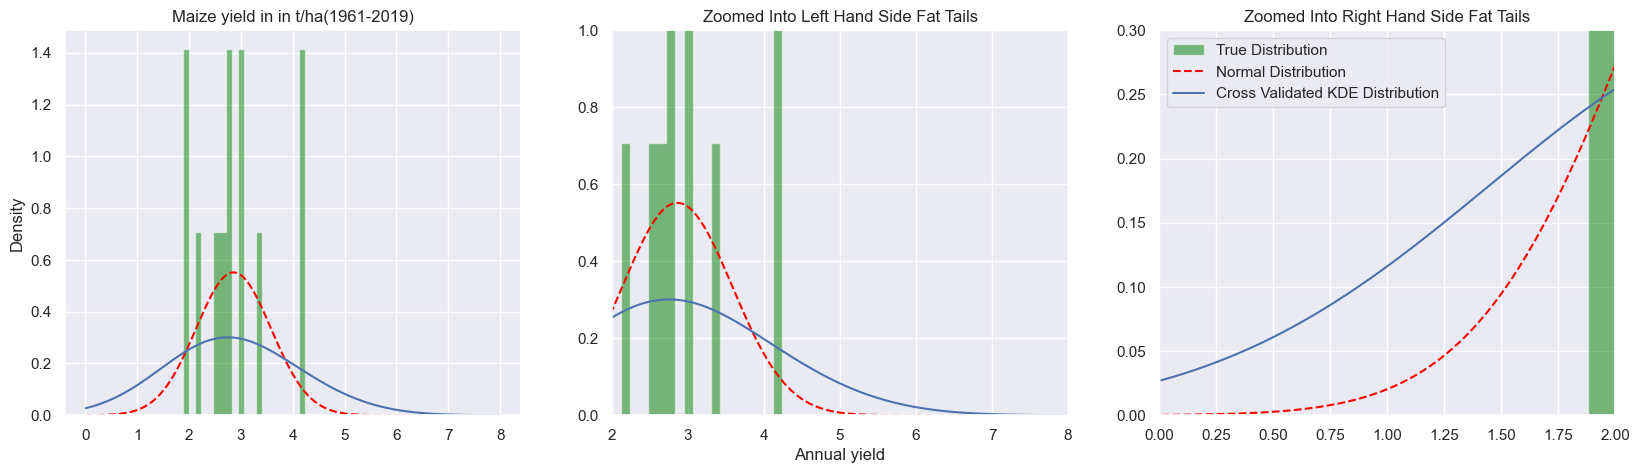

In [39]:
#Check optimality
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i in range(3):
    ax[i].hist(train_m, density=True, color='green', bins=20, alpha=0.5, 
               histtype='stepfilled', label='True Distribution')
    ax[i].plot(xs_m, normal_pdf(xs_m, mu_m, sigma_m), color='red', 
         linestyle='--', label='Normal Distribution')
    ax[i].plot(xs_m, best_kde_pdf_m, label='Cross Validated KDE Distribution')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Annual yield')
ax[0].set_title('Maize yield in in t/ha(1961-2019)')
ax[1].set_title('Zoomed Into Left Hand Side Fat Tails')
ax[2].set_title('Zoomed Into Right Hand Side Fat Tails')  

ax[1].set_xlim([2, 8])
ax[1].set_ylim([0, 1])
ax[2].set_xlim([0, 2])
ax[2].set_ylim([0, .3])
ax[2].legend();

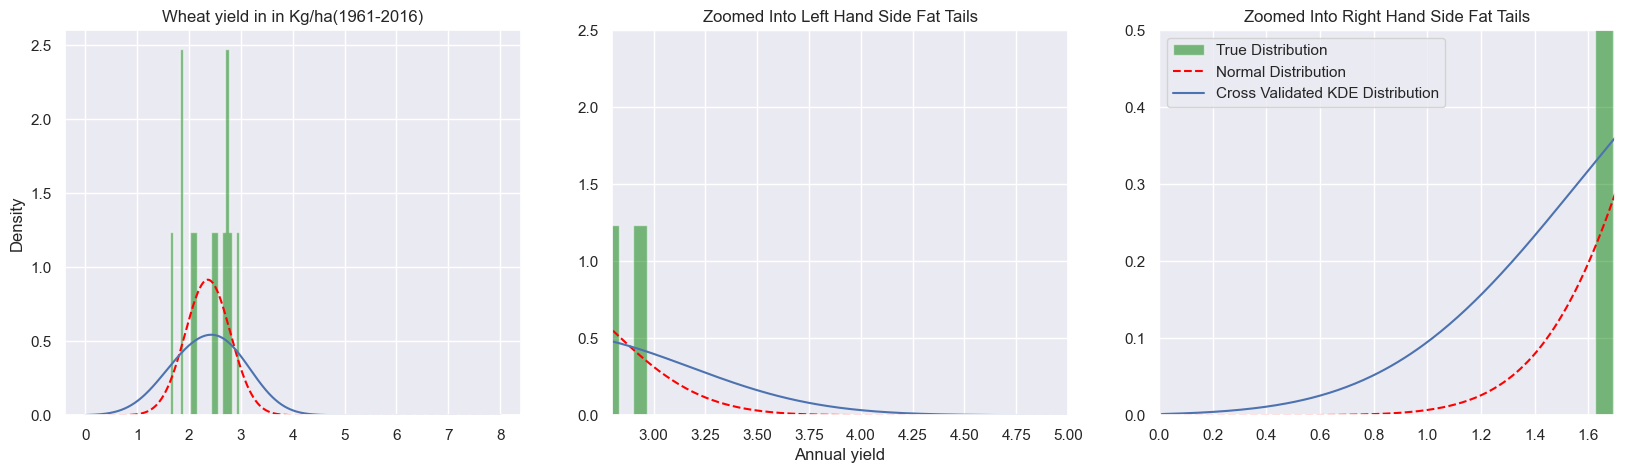

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i in range(3):
    ax[i].hist(train_w, density=True, color='green', bins=20, alpha=0.5, 
               histtype='stepfilled', label='True Distribution')
    ax[i].plot(xs_w, normal_pdf(xs_w, mu_w, sigma_w), color='red', 
         linestyle='--', label='Normal Distribution')
    ax[i].plot(xs_w, best_kde_pdf_w, label='Cross Validated KDE Distribution')

ax[0].set_ylabel('Density')
ax[1].set_xlabel('Annual yield')
ax[0].set_title('Wheat yield in in Kg/ha(1961-2016)')
ax[1].set_title('Zoomed Into Left Hand Side Fat Tails')
ax[2].set_title('Zoomed Into Right Hand Side Fat Tails')  

ax[1].set_xlim([2.8, 5])
ax[1].set_ylim([0, 2.5])
ax[2].set_xlim([0, 1.7])
ax[2].set_ylim([0, .5])
ax[2].legend();

2. Best fit with Silverman Rule

In [41]:
best_kde_msi = KernelDensity(bandwidth=0.364).fit(train_arr_m)
log_probs_msi = best_kde_msi.score_samples(xs_m.reshape(-1,1))
best_kde_pdf_msi = np.exp(log_probs_msi)
best_kde_wsi = KernelDensity(bandwidth=0.151).fit(train_arr_w)
log_probs_wsi = best_kde_wsi.score_samples(xs_w.reshape(-1,1))
best_kde_pdf_wsi = np.exp(log_probs_wsi)

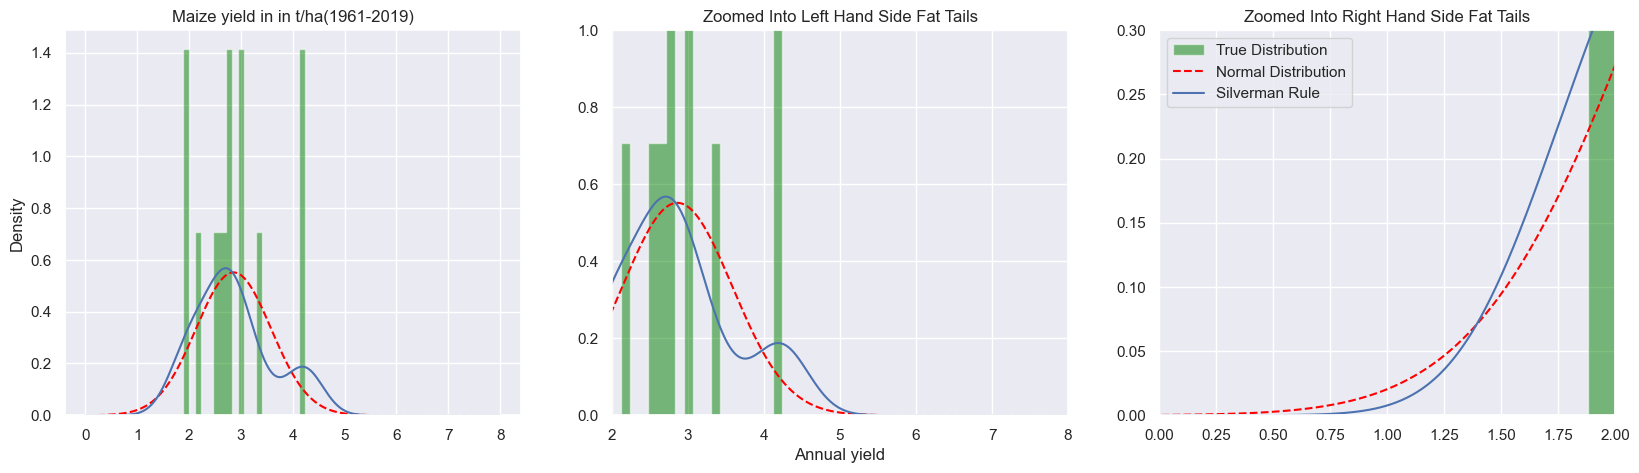

In [42]:
#Check optimality
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i in range(3):
    ax[i].hist(train_m, density=True, color='green', bins=20, alpha=0.5, 
               histtype='stepfilled', label='True Distribution')
    ax[i].plot(xs_m, normal_pdf(xs_m, mu_m, sigma_m), color='red', 
         linestyle='--', label='Normal Distribution')
    ax[i].plot(xs_m, best_kde_pdf_msi, label='Silverman Rule')
ax[0].set_ylabel('Density')
ax[1].set_xlabel('Annual yield')
ax[0].set_title('Maize yield in in t/ha(1961-2019)')
ax[1].set_title('Zoomed Into Left Hand Side Fat Tails')
ax[2].set_title('Zoomed Into Right Hand Side Fat Tails')  

ax[1].set_xlim([2, 8])
ax[1].set_ylim([0, 1])
ax[2].set_xlim([0, 2])
ax[2].set_ylim([0, .3])
ax[2].legend();

(0.0, 0.5)

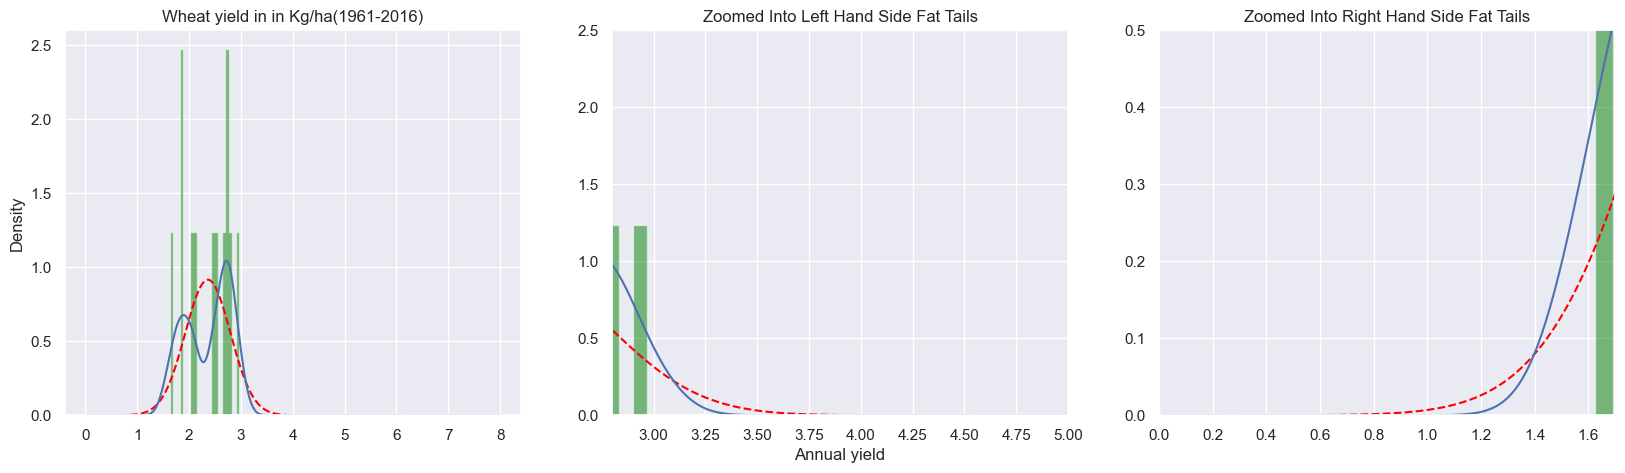

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
for i in range(3):
    ax[i].hist(train_w, density=True, color='green', bins=20, alpha=0.5, 
               histtype='stepfilled', label='True Distribution')
    ax[i].plot(xs_w, normal_pdf(xs_w, mu_w, sigma_w), color='red', 
         linestyle='--', label='Normal Distribution')
    ax[i].plot(xs_w, best_kde_pdf_wsi, label='Silverman Rule')

ax[0].set_ylabel('Density')
ax[1].set_xlabel('Annual yield')
ax[0].set_title('Wheat yield in in Kg/ha(1961-2016)')
ax[1].set_title('Zoomed Into Left Hand Side Fat Tails')
ax[2].set_title('Zoomed Into Right Hand Side Fat Tails')  

ax[1].set_xlim([2.8, 5])
ax[1].set_ylim([0, 2.5])
ax[2].set_xlim([0, 1.7])
ax[2].set_ylim([0, .5])

**Smimualte density model using new samples for each model**

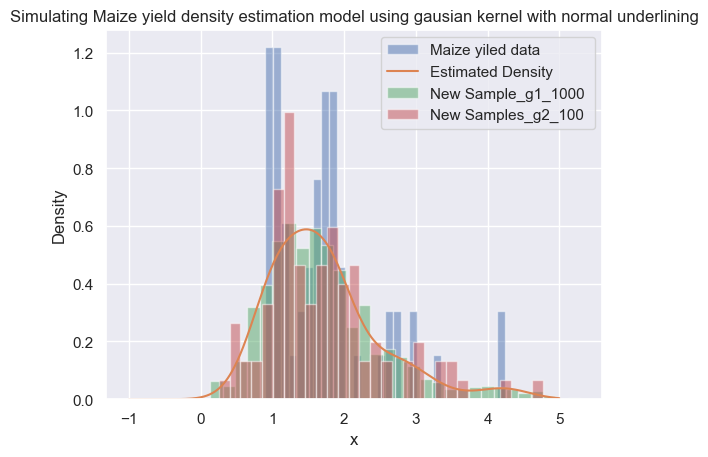

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# Create an instance of KernelDensity
kde_g = KernelDensity(kernel='gaussian', bandwidth=0.364)
# Fit the data
kde_g.fit(data_m.reshape(-1,1))
# Generate new samples from the estimated density
new_samples_g1 = kde_g.sample(1000)
new_samples_g2 = kde_g.sample(100)
# Evaluate the estimated density at some points
x = np.linspace(-1, 5, 1000)
log_density = kde_g.score_samples(x.reshape(-1, 1))
# Plot the original data, estimated density, and new samples
plt.hist(data_m.reshape(-1,1), bins=30, density=True, alpha=0.5, label='Maize yiled data')
plt.plot(x, np.exp(log_density), label='Estimated Density')
plt.hist(new_samples_g1, bins=30, density=True, alpha=0.5, label='New Sample_g1_1000 ')
plt.hist(new_samples_g2, bins=30, density=True, alpha=0.5, label='New Samples_g2_100 ')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title("Simulating Maize yield density estimation model using gausian kernel with normal underlining")
plt.show()

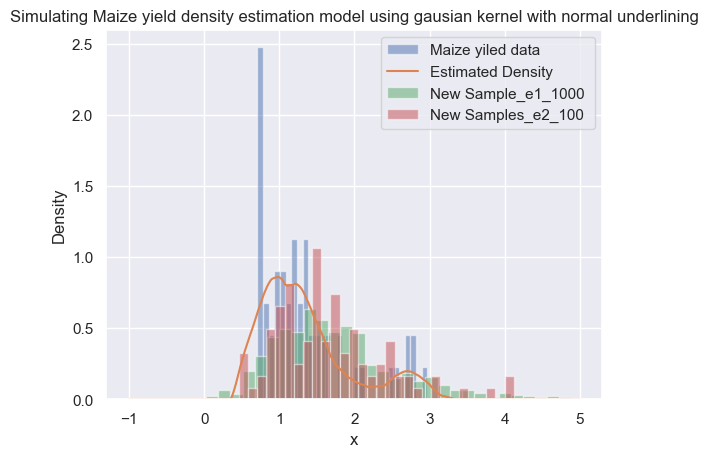

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
# Create an instance of KernelDensity
kde_e = KernelDensity(kernel='epanechnikov', bandwidth=0.364)
# Fit the data
kde_e.fit(data_w.reshape(-1,1))
# Generate new samples from the estimated density
new_samples_e1 = kde_g.sample(1000)
new_samples_e2 = kde_g.sample(100)
# Evaluate the estimated density at some points
x = np.linspace(-1, 5, 1000)
log_density = kde_e.score_samples(x.reshape(-1, 1))
# Plot the original data, estimated density, and new samples
plt.hist(data_w.reshape(-1,1), bins=30, density=True, alpha=0.5, label='Maize yiled data')
plt.plot(x, np.exp(log_density), label='Estimated Density')
plt.hist(new_samples_e1, bins=30, density=True, alpha=0.5, label='New Sample_e1_1000 ')
plt.hist(new_samples_e2, bins=30, density=True, alpha=0.5, label='New Samples_e2_100 ')
plt.legend()
plt.xlabel('x')
plt.ylabel('Density')
plt.title("Simulating Maize yield density estimation model using gausian kernel with normal underlining")
plt.show()

**Evaluating Bandwidth using Maximumlikelyhod estimation**

- For further evaluation of reported values of bandwidth using each of the kernel function, an examination using maximum likelyhood method considered as follow.

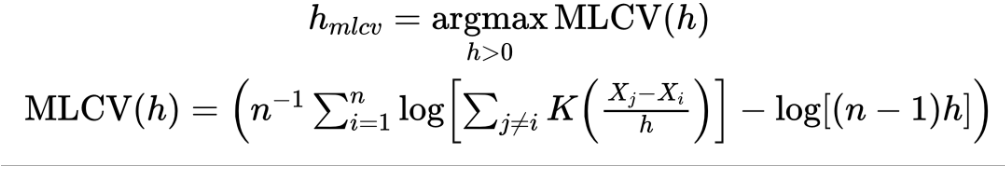

In [46]:
import numpy as np
from KDEpy import FFTKDE 
from tqdm import tqdm# to retrive time 
import time
def MLCV(data, bw):
    N = len(data)
    idx = np.ones(N, bool)
    logs = np.empty(N)
    for i in tqdm(range(N)):
        idx[i]=False
        x_kde, y_kde = FFTKDE(bw=bw).fit(data[idx]).evaluate(2**13)
        idx[i]=True
        logs[i] = np.sum(np.log(y_kde))
    MLCV = np.sum(logs)/N - np.log((N-1)*bw)
    return MLCV

In [73]:
#data_m = y_m
#data_w = y_w
h_m, h_w = 1.1,0.5 
t0 = time.process_time()
mlcv_m = MLCV(data=data_m, bw=h_m)
mlcv_w = MLCV(data=data_w, bw=h_w)
t1 = time.process_time()
print("h_LCVm = {:3.3E}, Elapsed Time = {:3.3}s".format(mlcv_m, t1-t0))
print("h_MLCVw = {:3.3E}, Elapsed Time = {:3.3}s".format(mlcv_w, t1-t0))

100%|█████████████████████████████████████████████████████████████████████████████████| 59/59 [00:00<00:00, 164.71it/s]

h_LCVm = -3.865E+04, Elapsed Time = 0.625s
h_MLCVw = -3.251E+04, Elapsed Time = 0.625s


- since `logx =m` equals, $m=e^x$
> - $h_m = e^{-2.981^5}$
> - $h_w = e^{-2.766^4}$

In [48]:
h_m,h_w = np.exp(-29810),np.exp(-27660)
print(f'h_m =',round(h_m,8),'\n''h_w =', round(h_w,8))

h_m = 0.0 
h_w = 0.0


**Improved Sheather Jones (ISJ)**

- With regard to limitation for both refernce/Silverman algorithm and CV method, `ISJ` plays important role.
- It is envoked for authomatic bandwidth selection and implemented in KDEpy with `FFTKDE`API
- According to[(Kuldeep JiwaniThales Group,2020)](https://www.researchgate.net/publication/343809424_ICDM_2020_Optimal_Kernel_Density_Estimation_using_FFT_based_cost_function),the general view is that while cross-validation criterion tends to under smooth and suffers from high sample variability, the plug-in estimates deliver a much more stable estimate but typically over smooths.
- ISJ does not assume normality, and is **robust to multimodal distributions**. The disadvantage is that it requires more data to make accurate assessments, and that the running time is slower. 
- Below we reconsidere maize and wheat yiled that were considered in the PR method  

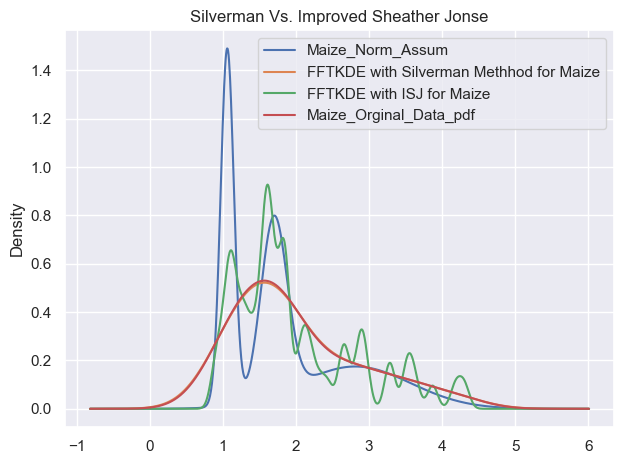

In [49]:
import numpy as np
from scipy import stats
from KDEpy import FFTKDE
# Recall the maize yield 
dist_m1 = stats.norm(loc=2.81,scale= 0.76)
dist_m2 = stats.norm(loc=1.70, scale=0.18)
dist_m3 = stats.norm(loc=1.06, scale=0.09)
#wieghts [0.34 0.44 0.22]
data_m = np.hstack([dist_m1.rvs(20),dist_m2.rvs(26),dist_m3.rvs(13)])
#plot the true distribution and KDE using Silvermans rule
x,y =FFTKDE(bw='silverman').fit(data_m)()
plt.plot(x,(dist_m1.pdf(x)+dist_m2.pdf(x)+dist_m3.pdf(x))/3,label ='Maize_Norm_Assum')
plt.plot(x,y,label='FFTKDE with Silverman Methhod for Maize')
#KDE using ISJ that is robust buet need more data
y =FFTKDE(bw='ISJ').fit(data_m)(x)
plt.plot(x,y,label='FFTKDE with ISJ for Maize')
pd.Series(data_m.reshape(59)).plot.kde(label ='Maize_Orginal_Data_pdf')
plt.title('Silverman Vs. Improved Sheather Jonse')
plt.tight_layout()
plt.legend(loc='best')

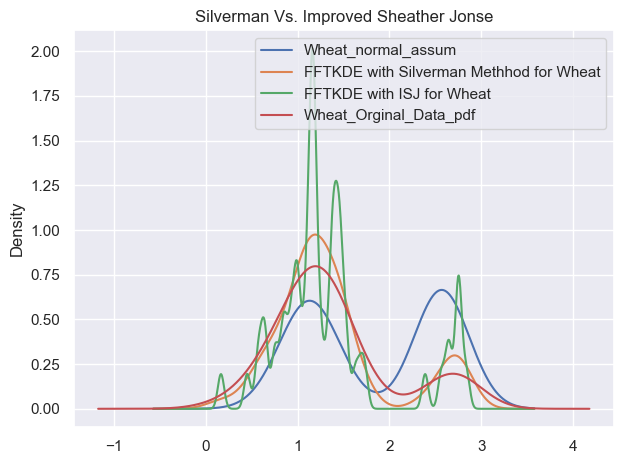

In [50]:
import numpy as np
from scipy import stats
from KDEpy import FFTKDE
# Recall the maize yield 
dist_w1 = stats.norm(loc=1.13,scale= 0.33)
dist_w2 = stats.norm(loc=2.57, scale=0.30)
#wieghts [0.85 0.15]
data_w = np.hstack([dist_w1.rvs(50),dist_w2.rvs(9)])
#plot the true distribution and KDE using Silvermans rule
x,y =FFTKDE(bw='silverman').fit(data_w)()
plt.plot(x,(dist_w1.pdf(x)+dist_w2.pdf(x))/2,label ='Wheat_normal_assum')
plt.plot(x,y,label='FFTKDE with Silverman Methhod for Wheat')
#KDE using ISJ that is robust buet need more data
y =FFTKDE(bw='ISJ').fit(data_w)(x)
plt.plot(x,y,label='FFTKDE with ISJ for Wheat')
pd.Series(data_w.reshape(59)).plot.kde(label ='Wheat_Orginal_Data_pdf')
plt.title('Silverman Vs. Improved Sheather Jonse')
plt.tight_layout()
plt.legend(loc='best')

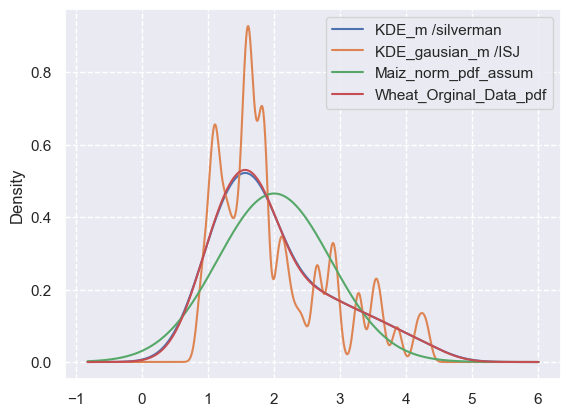

In [51]:
from KDEpy import FFTKDE
from scipy.stats import norm
# Generate a distribution and some multimodal data
dist_m = norm(np.mean(data_m), np.std(data_m))
# Compute density estimates using 'silverman'
x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data_m).evaluate()
plt.plot(x, y, label='KDE_m /silverman')
# Compute density estimates using 'ISJ' - Improved Sheather Jones
y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data_m).evaluate(x)
plt.plot(x, y, label='KDE_gausian_m /ISJ')
plt.plot(x, dist_m.pdf(x), label ='Maiz_norm_pdf_assum')
pd.Series(data_m.reshape(59)).plot.kde(label ='Wheat_Orginal_Data_pdf')
plt.grid(True, ls='--', zorder=-15)
plt.legend()

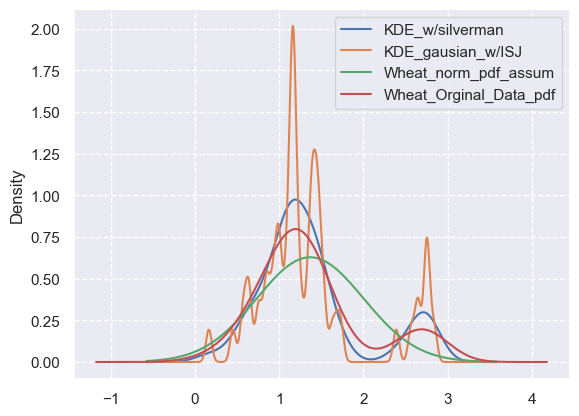

In [52]:
from KDEpy import FFTKDE
from scipy.stats import norm
# Generate a distribution and some multimodal data
dist_w = norm(np.mean(data_w), np.std(data_w))
# Compute density estimates using 'silverman'
x, y = FFTKDE(kernel='gaussian', bw='silverman').fit(data_w).evaluate()
plt.plot(x, y, label='KDE_w/silverman')
# Compute density estimates using 'ISJ' - Improved Sheather Jones
y = FFTKDE(kernel='gaussian', bw='ISJ').fit(data_w).evaluate(x)
plt.plot(x, y, label='KDE_gausian_w/ISJ')
plt.plot(x, dist_w.pdf(x), label='Wheat_norm_pdf_assum')
pd.Series(data_w.reshape(59)).plot.kde(label ='Wheat_Orginal_Data_pdf')
plt.grid(True, ls='--', zorder=-15)
plt.legend()

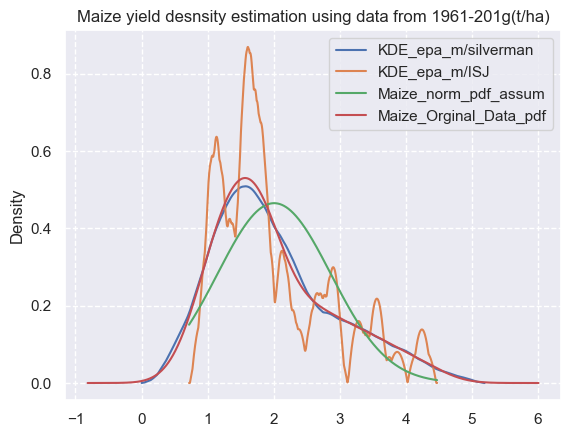

In [53]:
from KDEpy import FFTKDE
from scipy.stats import norm
# Compute density estimates using 'ISJ' - Improved Sheather Jones
# Compute density estimates using 'epa' and 'ISJ' - Improved Sheather Jones
x,y = FFTKDE(kernel='epa', bw='silverman').fit(data_m).evaluate()
plt.plot(x, y, label='KDE_epa_m/silverman')
x,y = FFTKDE(kernel='epa', bw='ISJ').fit(data_m).evaluate()
plt.plot(x, y, label='KDE_epa_m/ISJ')
plt.plot(x, dist_m.pdf(x), label='Maize_norm_pdf_assum')
pd.Series(data_m.reshape(59)).plot.kde(label ='Maize_Orginal_Data_pdf')
plt.title('Maize yield desnsity estimation using data from 1961-201g(t/ha)')
plt.grid(True, ls='--', zorder= 1); plt.legend();

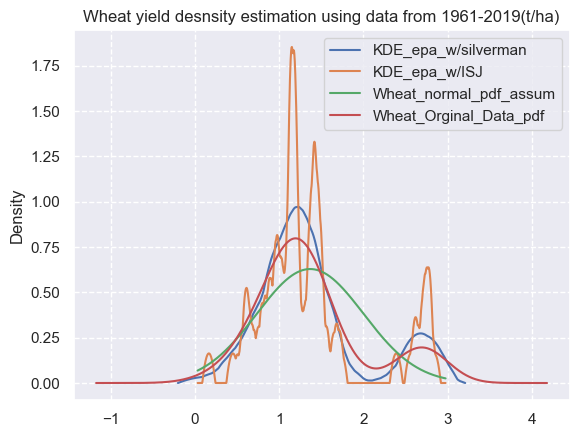

In [54]:
from KDEpy import FFTKDE
from scipy.stats import norm
# Compute density estimates using 'ISJ' - Improved Sheather Jones
# Compute density estimates using 'epa' and 'ISJ' - Improved Sheather Jones
x,y = FFTKDE(kernel='epa', bw='silverman').fit(data_w).evaluate()
plt.plot(x, y, label='KDE_epa_w/silverman')
x,y = FFTKDE(kernel='epa', bw='ISJ').fit(data_w).evaluate()
plt.plot(x, y, label='KDE_epa_w/ISJ')
plt.plot(x, dist_w.pdf(x), label='Wheat_normal_pdf_assum')
pd.Series(data_w.reshape(59)).plot.kde(label ='Wheat_Orginal_Data_pdf')
plt.title('Wheat yield desnsity estimation using data from 1961-2019(t/ha)')
plt.grid(True, ls='--', zorder= 1); plt.legend();

- In all the cases, kernel density estimation using Silverman bandwidth selection, whether the kernel function is gausian or epanechnikov, outperforms ISJ and gives better fit to the orginal data. 
- With respect to type of kernel function both gausian and Epanechnikov kernels seems equally candidate. However, since normality assumption does not work well for datasets to the current study, deployment of Epanechnikove kerenls sounds more. - With this premisis, consodering both maize and wheta yield as multimodal distribution will lead to selection of Epanechnikove kernel function with Silverman algorithm as best fitting non-parametric model of crop yield density estimation. This then supported by the emperical result with bandwidth and mean square error for maize are 0.364,31.704. 

**Burr Distribution**
- Burr Distribution with its shape parameter `c>0` and `k>0` can generalize most important distribution like

> - Normal Distribution
> - Lognormal distribution
> - Gamma Distribution
> - Weibul Ditribution($k=\infty$)
> - Pareto Distribution($c=k=1$)


- The Burr distribution, known for its flexibility in modeling various types of data, can be integrated into KDE for more tailored density estimation.There are two options in this case

   i. **Incorporating Burr Distribution**: we can modify the kernel function $\( K \)$ to reflect the Burr distribution's characteristics. This might involve using the Burr distribution's probability density function as the kernel.
   ii. Derive overall roughness of BurrXII so as to estimate AMISE and `h`

- Bellow, we discussed each for both maize and wheat yield using `statsmodels` or `scipy`), 

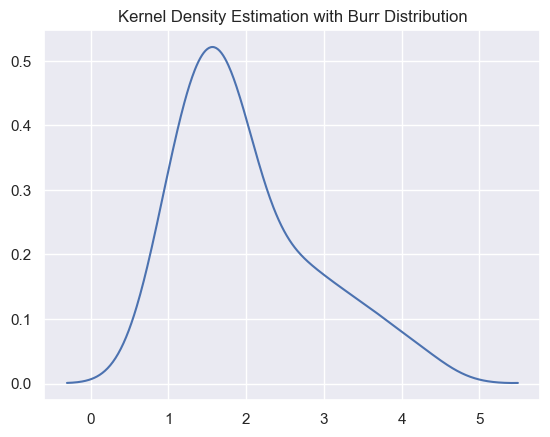

In [55]:
import numpy as np
from scipy.stats import burr12
import matplotlib.pyplot as plt
from statsmodels.nonparametric.kde import KDEUnivariate
# Sample data
data = data_m
# Define Burr kernel function
def burr_kernel(x, c, d):
    return burr.pdf(x, c, d)
# Perform KDE
kde = KDEUnivariate(data)
kde.fit(kernel='gau', bw='scott')  # Using Gaussian kernel as an example
# Plot the results
plt.plot(kde.support, kde.density, label='KDE_Gau_scott')
plt.title('Kernel Density Estimation with Burr Distribution')
plt.show()

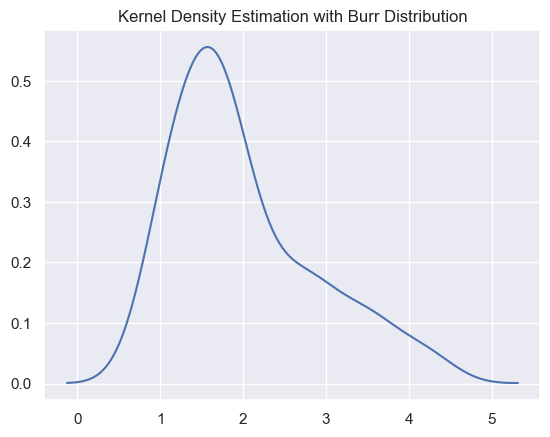

In [56]:
kde.fit(kernel='gau', bw='silverman')  # Using Gaussian kernel as an example
plt.plot(kde.support, kde.density, label='KDE_gauw_Silverman')
plt.title('Kernel Density Estimation with Burr Distribution')
plt.show()

In [57]:
#genarate sample data fo maize yield
c_m, k_m, d_m,s_m = 1.085, 176.89, 0.90, 100.98
c_w, k_w, d_w,s_w =6.75,0.39,-0.01,0.91
distB_m = burr12(c=c_m,d = k_m)
distB_w = burr12(c=c_w,d = k_w)
#generate random variate
r1m = burr12.rvs(c=c_m, d=k_m,size=1000)/s_m
r2m = burr12.rvs(c=c_m, d=k_m,size =100)/s_m
r1w = burr12.rvs(c=c_w, d=k_w,size=1000)/s_w
r2w = burr12.rvs(c=c_w, d=k_w,size =100)/s_w
data_m = Crop_yield['Maize_yield'].values
data_w = Crop_yield['Wheat_yield'].values
#redefine centered burr distribution
data_mck = (s_m*data_m-d_m)/s_m
data_wck = (s_w*data_w-d_w)/s_w
ym = (data_m -d_m)/s_m
yw = (data_w -d_w)/s_w

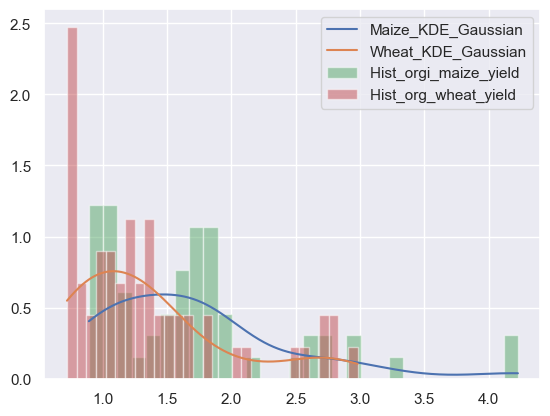

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import burr12, gaussian_kde
# Generate sample data
#data = burr.rvs(c=2.0, d=5.0, size=1000)
#data=data_m
# Perform KDE with Gaussian kernel
kde_m = gaussian_kde(data_mck, bw_method='silverman')
kde_w = gaussian_kde(data_wck, bw_method='silverman')
# Evaluate the density estimate
x_m = np.linspace(min(data_mck), max(data_mck), 1000)
x_w = np.linspace(min(data_wck), max(data_wck), 1000)
density_m = kde_m(x_m)
density_w = kde_w(x_w)
# Plot the results
plt.plot(x_m, density_m, label='Maize_KDE_Gaussian')
plt.plot(x_w, density_w, label='Wheat_KDE_Gaussian')
plt.hist(data_mck, bins=30, density=True, alpha=0.5, label='Hist_orgi_maize_yield ')
plt.hist(data_wck, bins=30, density=True, alpha=0.5, label='Hist_org_wheat_yield ')
plt.legend()
plt.show()

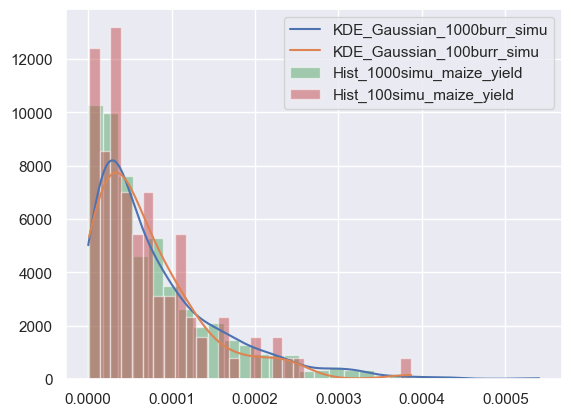

In [59]:
from scipy.stats import burr12, gaussian_kde
# Generate sample data using burrxII
data_s1 = burr12.rvs(c=c_m, d=k_m, size=1000)/s_m
data_s2 = burr12.rvs(c=c_m, d=k_m, size=100)/s_m
# Perform KDE with Gaussian kernel
kde_s1 = gaussian_kde(data_s1, bw_method='silverman')
kde_s2 = gaussian_kde(data_s2, bw_method='silverman')
# Evaluate the density estimate
x_s1 = np.linspace(min(data_s1), max(data_s1), 1000)
x_s2 = np.linspace(min(data_s2), max(data_s2), 100)
density_s1 = kde_s1(x_s1)
density_s2 = kde_s2(x_s2)
# Plot the results
plt.plot(x_s1, density_s1, label='KDE_Gaussian_1000burr_simu')
plt.plot(x_s2, density_s2, label='KDE_Gaussian_100burr_simu')
plt.hist(data_s1, bins=30, density=True, alpha=0.5, label='Hist_1000simu_maize_yield')
plt.hist(data_s2, bins=30, density=True, alpha=0.5, label='Hist_100simu_maize_yield')
plt.legend()
plt.show()

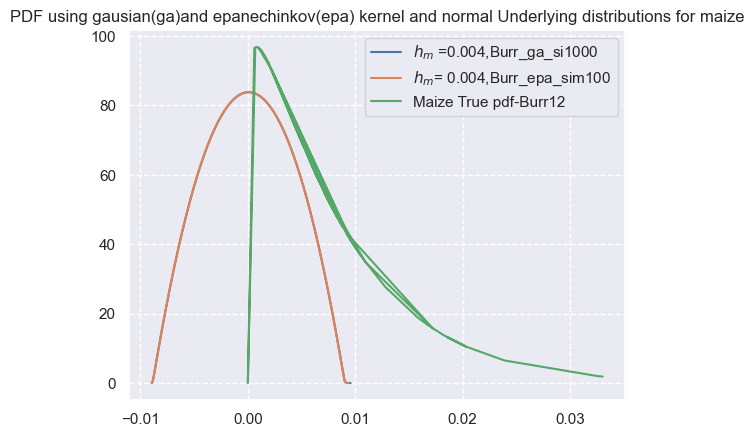

In [60]:
x, y = FFTKDE(kernel='epa', bw=0.004).fit(r1m).evaluate()
plt.plot(x, y, label='$h_m$ =0.004,Burr_ga_si1000')
x, y = FFTKDE(kernel='epa', bw=0.004).fit(r2m).evaluate()
plt.plot(x, y, label='$h_m$= 0.004,Burr_epa_sim100')
plt.plot(ym, distB_m.pdf(ym), label='Maize True pdf-Burr12')
plt.grid(True, ls='--', zorder=0)
plt.title("PDF using gausian(ga)and epanechinkov(epa) kernel and normal Underlying distributions for maize")
plt.legend();
#wheat yield dennsity using 

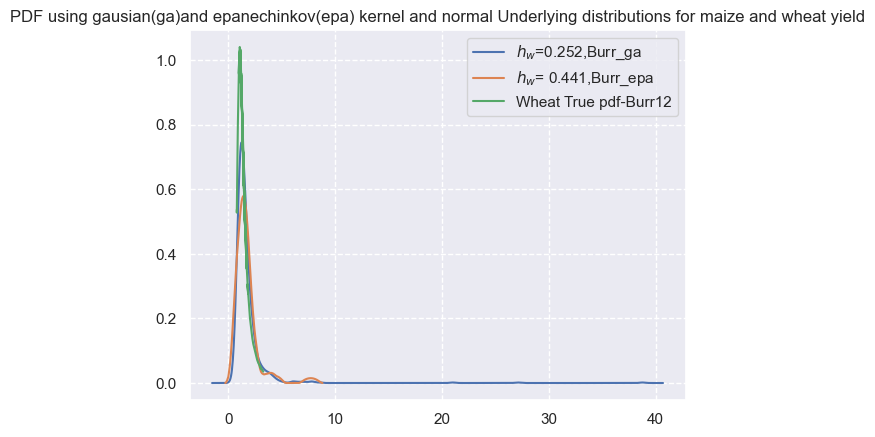

In [61]:
x, y = FFTKDE(kernel='gaussian', bw=0.252).fit(r1w).evaluate()
plt.plot(x, y, label='$h_w$=0.252,Burr_ga')
x, y = FFTKDE(kernel='epa', bw=0.441).fit(r2w).evaluate()
plt.plot(x, y, label='$h_w$= 0.441,Burr_epa')
plt.plot(yw, distB_w.pdf(yw), label='Wheat True pdf-Burr12')
plt.grid(True, ls='--', zorder=1)
plt.title("PDF using gausian(ga)and epanechinkov(epa) kernel and normal Underlying distributions for maize and wheat yield")
plt.legend();

-The Burr distribution can be employed in kernel density estimation, offering a versatile framework particularly useful for modeling heavy-tailed and skewed data distributions

- Below are then some statistical result of perfomance measure to the BurrXII approach.

In [62]:
a_m = c_m*(c_m-k_m-1)
b_m =c_m*(4*c_m -5*k_m-10)+k_m*(k_m+4)+3
a_w = c_w*(c_w-k_w-1)
b_w =c_w*(4*c_w-5*k_w-10)+k_w*(k_w+4)+3
print(f"a_m :", round(a_m,3),
      '\n''b_m',round(b_m,3),
      '\n''....',
      '\n' "a_w:",round(a_w,3),
      '\n' "b_w:",round(b_w,3)
      )

a_m : -191.833 
b_m 31034.863 
.... 
a_w: 36.18 
b_w: 106.3


In [63]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from sympy import * 
A_m = c_m*k_m**2/(gamma(6+2*k_m))
B_m = a_m**2*(gamma((6*c_m-5)/c_m)*gamma((2*c_m*k_m+5)/c_m)) 
C_m = 2*a_m*gamma((4*c_m-5)/c_m)*gamma((2*c_m*(k_m+1)+5)/c_m)
D_m = 2*a_m*b_m*gamma((5*c_m-5)/c_m)*gamma((c_m*(2*k_m+1)+5)/c_m)
E_m = b_m**2*gamma((4*c_m-5)/c_m)*gamma((2*c_m*k_m+5)/c_m)
F_m = gamma((2*c_m-5)/c_m)*gamma((2*c_m*(k_m+2)+5)/c_m)
ISD_m = A_m*(B_m-C_m+D_m-E_m+F_m)
ISD_m

-200094748506.103

In [64]:
A_w = c_w*k_w**2/(gamma(6+2*k_w))
B_w = a_w**2*(gamma((6*c_w-5)/c_w)*gamma((2*c_w*k_w+5)/c_w)) 
C_w = 2*a_w*gamma((4*c_w-5)/c_w)*gamma((2*c_w*(k_w+1)+1)/c_w)
D_w = 2*a_w*b_w*gamma((5*c_w-c_w)/c_w)*gamma((c_w*(2*k_w+1)+5)/c_w)
E_w = b_w**2*gamma((4*c_w-5)/c_w)*gamma((2*c_w*k_w+5)/c_w)
F_w = gamma((2*c_w-5)/c_w)*gamma(((2*c_w*k_w+2)+5)/c_w)
ISD_w = A_w*(B_w-C_w+D_w-E_w+F_w)
round(ISD_w,3)

166.437

In [65]:
# bandwidth using epa kernel and burr12 distribution
n= 59
h_mb = (10/(n*(abs(ISD_m))))**0.2
h_wb = (10/(n*ISD_w))**0.2
print(f'optmal bandwidth for epa kernel with burr12 distribution for:',
      '\n''Maize:',round(h_mb,3),
      '\n''wheat:',round(h_wb,3))

optmal bandwidth for epa kernel with burr12 distribution for: 
Maize: 0.004 
wheat: 0.252


In [66]:
amise_mb = (1/100)*(abs(ISD_m))*h_mb**4+2/(5*n*h_mb)
amise_wb = (1/100)*ISD_w*h_wb**4+2/(5*n*h_wb)
print(f"AMISE using epa kernel and burrXII distribution for:",
      '\n' 'Maize',round(amise_mb,3),
      '\n' 'Wheat',round(amise_wb,3))

AMISE using epa kernel and burrXII distribution for: 
Maize 2.201 
Wheat 0.034


In [67]:
# bandwidth using gausian kernel and burr12 distribution
n= 59
h_mn = (10/(np.sqrt(2*np.pi)*n*(abs(ISD_m))))**0.2
h_wn = (10/(2*np.sqrt(np.pi)*ISD_w))**0.2
print(f'optmal bandwidth for gausian kernel with burr12 distribution for:',
      '\n''Maize:',round(h_mn,3),
      '\n''wheat:',round(h_wn,3))

optmal bandwidth for gausian kernel with burr12 distribution for: 
Maize: 0.003 
wheat: 0.442


In [68]:
amise_mn = (1/100)*ISD_m*h_mn**4+1/(2*np.sqrt(np.pi)*n*h_mn)
amise_wn = (1/100)*ISD_w*h_wn**4+2/(2*np.sqrt(np.pi)*n*h_wn)
print(f"AMISE using epa kernel and burrXII distribution for:",
      '\n' 'Maize',round(amise_mn,3),
      '\n' 'Wheat',round(amise_wn,3))

AMISE using epa kernel and burrXII distribution for: 
Maize 1.281 
Wheat 0.085
